<a href="https://colab.research.google.com/github/skyshine460/ProdTaken/blob/main/ProdTaken_catboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1227]:
pip install catboost

In [1228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import lightgbm as lgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [1229]:
train_df = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/test.csv')

# „Éá„Éº„Çø„ÅÆÊï¥ÁêÜ

ÁõÆÁöÑÂ§âÊï∞ÔºöProdTakenÔºàÂïÜÂìÅ„ÅÆÂ•ëÁ¥ÑÁä∂ÊÖã(0:‰∏çÊàêÁ¥Ñ„ÄÅ1:ÊàêÁ¥Ñ)Ôºâ


Ë©ï‰æ°ÊåáÊ®ôÔºöAUC

In [1230]:
# ÂêÑ„Ç´„É©„É†„ÅÆ„Éá„Éº„ÇøÂûã„Å®Ê¨†ÊêçÂÄ§ÔºànanÔºâ„ÇíË°®Á§∫
def information_df(df):
    pd.set_option('display.max_rows', None)
    type_series = df.dtypes
    nunique_series = df.nunique()
    nan_count_series = df.isnull().sum()
    unique_values_series = df.apply(lambda col: list(col.unique()))
    info_df = pd.DataFrame({
        'dtypes': type_series,
        'NaN Count': nan_count_series,
        'Nunique': nunique_series,
        'Unique Values': unique_values_series,
    })
    print(f'(index, col) : {df.shape}')
    return info_df

In [1231]:
information_df(train_df)

(index, col) : (3489, 18)


dtypes  NaN Count  Nunique  \
id                        int64          0     3489   
Age                      object        100      237   
TypeofContact            object          6        2   
CityTier                  int64          0        3   
DurationOfPitch          object        121       65   
Occupation               object          0        3   
Gender                   object          0       18   
NumberOfPersonVisiting  float64          0        4   
NumberOfFollowups       float64         33       11   
ProductPitched           object          0       76   
PreferredPropertyStar   float64          0        3   
NumberOfTrips            object         22       18   
Passport                  int64          0        2   
PitchSatisfactionScore    int64          0        5   
Designation              object          0       53   
MonthlyIncome            object         56     2542   
customer_info            object          0     1729   
ProdTaken                 int64          0        2   

                                                            Unique Values  
id                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
Age                     [50Ê≠≥, 56Ê≠≥, nan, ‰∏âÂçÅ‰∏ÉÊ≠≥, 48Ê≠≥, 19Ê≠≥, 47Ê≠≥, 49Ê≠≥, 33Ê≠≥,...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [900Áßí, 14ÂàÜ, 10ÂàÜ, 1080Áßí, 1020Áßí, 16ÂàÜ, 840Áßí, 22ÂàÜ,...  
Occupation                     [Large Business, Salaried, Small Business]  
Gender                  [male, Male, Female, female, ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ, FEMALE, Ôº≠...  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups       [4.0, 3.0, 5.0, 1.0, 2.0, 100.0, nan, 500.0, 4...  
ProductPitched          [Basic, Standard, Super Deluxe, basic, SUPER D...  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips           [5, 2, 4, 1, Âπ¥„Å´1Âõû, Âπ¥„Å´2Âõû, Âπ¥„Å´6Âõû, 3, Âπ¥„Å´5Âõû, 7, 6, ...  
Passport                                                           [1, 0]  
PitchSatisfactionScore                                    [4, 5, 3, 2, 1]  
Designation             [Executive, Senior Manager, AVP, Manager, Seni...  
MonthlyIncome           [253905.0, 404475.0, 278145.0, 326805.0, 25843...  
customer_info           [Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø,Ëªä„ÅÇ„Çä,Â≠ê‰æõÁÑ°„Åó, ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ,Â≠ê‰æõ„Å™„Åó...  
ProdTaken                                                          [1, 0]

In [1232]:
information_df(test_df)

(index, col) : (3489, 17)


dtypes  NaN Count  Nunique  \
id                        int64          0     3489   
Age                      object         93      236   
TypeofContact            object         12        2   
CityTier                  int64          0        3   
DurationOfPitch          object        131       65   
Occupation               object          0        3   
Gender                   object          0       17   
NumberOfPersonVisiting  float64          0        4   
NumberOfFollowups       float64         24       11   
ProductPitched           object          0       71   
PreferredPropertyStar   float64          0        3   
NumberOfTrips            object         42       18   
Passport                  int64          0        2   
PitchSatisfactionScore    int64          0        5   
Designation              object          0       56   
MonthlyIncome            object         49     2528   
customer_info            object          0     1730   

                                                            Unique Values  
id                      [3489, 3490, 3491, 3492, 3493, 3494, 3495, 349...  
Age                     [ÔºîÔºòÊ≠≥, 30‰ª£, 25Ê≠≥, 21Ê≠≥, 41Ê≠≥, 45Ê≠≥, 44Êâç, 30Èöõ, 31Èöõ, ...  
TypeofContact                        [Self Enquiry, Company Invited, nan]  
CityTier                                                        [2, 1, 3]  
DurationOfPitch         [13ÂàÜ, 12ÂàÜ, 540Áßí, 420Áßí, 7ÂàÜ, nan, 8ÂàÜ, 16ÂàÜ, 22ÂàÜ, ...  
Occupation                     [Small Business, Salaried, Large Business]  
Gender                  [Male, Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ, Female, MALE, male, ÔΩçÔΩÅÔΩåÔΩÖ, Ôº≠ÔΩÅÔΩåÔΩÖ,...  
NumberOfPersonVisiting                               [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups       [4.0, 3.0, 300.0, 5.0, 400.0, 1.0, 2.0, 6.0, 1...  
ProductPitched          [Super De|uxe, Standard, Basic, Deluxe, Super ...  
PreferredPropertyStar                                     [3.0, 4.0, 5.0]  
NumberOfTrips           [7, 4, 1, Âπ¥„Å´6Âõû, 5, 3, 2, Âπ¥„Å´4Âõû, Âπ¥„Å´1Âõû, 6, Âπ¥„Å´2Âõû, ...  
Passport                                                           [0, 1]  
PitchSatisfactionScore                                    [3, 4, 5, 2, 1]  
Designation             [AVP, Senior Manager, Executive, Manager, VP, ...  
MonthlyIncome           [496950.0, ÊúàÂèé30.0‰∏áÂÜÜ, ÊúàÂèé26.0‰∏áÂÜÜ, 259875.0, 26883...  
customer_info           [ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó, ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó, Èõ¢Â©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ...

# EDA


In [1233]:
def plot_histograms(train_df, col, bins=100):
    target = 'ProdTaken'

    bins = np.linspace(train_df[col].min(), train_df[col].max(), bins)

    data_all = train_df[col]
    data_ProdTaken_0 = train_df[train_df[target] == 0][col]
    data_ProdTaken_1 = train_df[train_df[target] == 1][col]

    plt.figure(figsize=(12, 6))
    plt.hist(data_all, bins=bins, alpha=0.5, color='green', label='All Data', density=False, edgecolor='black')
    plt.hist(data_ProdTaken_0, bins=bins, alpha=0.5, color='blue', label='ProdTaken: 0', density=False, edgecolor='black')
    plt.hist(data_ProdTaken_1, bins=bins, alpha=0.5, color='orange', label='ProdTaken: 1', density=False, edgecolor='black')

    plt.xlim(train_df[col].min(), train_df[col].max())
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col} by ProdTaken')
    plt.legend()
    plt.show()

def barplots(train_df, col):
    target = 'ProdTaken'

    unique_values = train_df[col].nunique()
    counts_ProdTaken_0 = train_df[train_df[target] == 0][col].value_counts().sort_index()
    counts_ProdTaken_1 = train_df[train_df[target] == 1][col].value_counts().sort_index()

    bar_width = 0.35
    indices = np.arange(len(counts_ProdTaken_0))

    plt.figure(figsize=(8, 6))
    plt.bar(indices, counts_ProdTaken_0, bar_width, label='ProdTaken: 0', color='blue', edgecolor='black')
    plt.bar(indices + bar_width, counts_ProdTaken_1, bar_width, label='ProdTaken: 1', color='orange', edgecolor='black')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Bar Chart of {col} by ProdTaken')
    plt.xticks(indices + bar_width / 2, counts_ProdTaken_0.index)
    plt.legend()
    plt.show()

def crosstab_df(col):
    crosstab = pd.crosstab(train_df[col], train_df['ProdTaken'])
    crosstab['ProdTaken_1_ratio'] = crosstab[1] / (crosstab[0] + crosstab[1])
    return crosstab

def category_and_category(col1, col2):
    train_df[col1+"_"+col2] = train_df[col1].astype(str) + '_' + train_df[col2].astype(str)
    train_df[col1+"_"+col2] = train_df[col1+"_"+col2].astype('category')
    test_df[col1+"_"+col2] = test_df[col1].astype(str) + '_' + test_df[col2].astype(str)
    test_df[col1+"_"+col2] = test_df[col1+"_"+col2].astype('category')

# Age

In [1234]:
train_df['Age'] = train_df['Age'].replace('', np.nan)  # Replace empty strings with NaN
train_df['Age'] = train_df['Age'].str.replace('[Ê≠≥ÊâçÈöõ]', '', regex=True)  # Remove "Ê≠≥" or "Êâç" or "Ê≠≥"

def convert_full_width_to_half_width(text): # ÂçäËßíÂÖ®Ëßí„ÅÆÂ§âÊèõ
    if isinstance(text, str):
        table = str.maketrans('ÔºêÔºëÔºíÔºìÔºîÔºïÔºñÔºóÔºòÔºô', '0123456789')
        return text.translate(table)
    return text
train_df['Age'] = train_df['Age'].apply(convert_full_width_to_half_width)

age_generations = { #Âπ¥‰ª£„ÅÆÂ§âÊèõ
    '20‰ª£': 25, '30‰ª£': 35, '40‰ª£': 45, '50‰ª£': 55, '60‰ª£': 65,
    'ÔºíÔºê‰ª£': 25, 'ÔºìÔºê‰ª£': 35, 'ÔºîÔºê‰ª£': 45, 'ÔºïÔºê‰ª£': 55, 'ÔºñÔºê‰ª£': 65,
}
train_df['Age'] = train_df['Age'].replace(age_generations, regex=True)

# ‰øÆÊ≠£„Åï„Çå„ÅüÊº¢Êï∞Â≠óÂ§âÊèõÈñ¢Êï∞
def convert_kansuuji_to_arabic_number(kansuuji):
    # Êº¢Êï∞Â≠óÂ§âÊèõË°®
    convert_table = str.maketrans("‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πù", "123456789")
    unit_under_thousand = {"ÂçÅ": 1, "Áôæ": 2, "ÂçÉ": 3}

    if not isinstance(kansuuji, str):
        return kansuuji  # ÊñáÂ≠óÂàó„Åß„Å™„ÅÑÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

    arabic_number = ''
    base_unit = 0
    reversed_kansuuji = list(reversed(kansuuji))

    for i, character in enumerate(reversed_kansuuji):
        if character in unit_under_thousand:  # Âçò‰Ωç„ÅÆÂá¶ÁêÜ
            arabic_number = arabic_number.zfill(unit_under_thousand[character] + base_unit)
            if i == len(reversed_kansuuji) - 1 or reversed_kansuuji[i+1] in unit_under_thousand:
                arabic_number = '1' + arabic_number
        else:  # ‰∏Ä„Äú‰πù„ÅÆÂá¶ÁêÜ
            arabic_number = character.translate(convert_table) + arabic_number

    return arabic_number

# Êº¢Êï∞Â≠ó„ÅÆÂ§âÊèõ„ÇíË°å„ÅÜ
train_df['Age'] = train_df['Age'].apply(lambda x: convert_kansuuji_to_arabic_number(x) if isinstance(x, str) else x)

# Êº¢Êï∞Â≠óÂ§âÊèõÂæå„Å´Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
train_df['Age'] = pd.to_numeric(train_df['Age'], errors='coerce').astype('Int64')
# train_df['Age'].value_counts()

In [1235]:
test_df['Age'] = test_df['Age'].replace('', np.nan)  # Replace empty strings with NaN
test_df['Age'] = test_df['Age'].str.replace('[Ê≠≥ÊâçÈöõ]', '', regex=True)  # Remove "Ê≠≥" or "Êâç" or "Ê≠≥"

def convert_full_width_to_half_width(text): # ÂçäËßíÂÖ®Ëßí„ÅÆÂ§âÊèõ
    if isinstance(text, str):
        table = str.maketrans('ÔºêÔºëÔºíÔºìÔºîÔºïÔºñÔºóÔºòÔºô', '0123456789')
        return text.translate(table)
    return text
test_df['Age'] = test_df['Age'].apply(convert_full_width_to_half_width)

age_generations = { #Âπ¥‰ª£„ÅÆÂ§âÊèõ
    '20‰ª£': 25, '30‰ª£': 35, '40‰ª£': 45, '50‰ª£': 55, '60‰ª£': 65,
    'ÔºíÔºê‰ª£': 25, 'ÔºìÔºê‰ª£': 35, 'ÔºîÔºê‰ª£': 45, 'ÔºïÔºê‰ª£': 55, 'ÔºñÔºê‰ª£': 65,
}
test_df['Age'] = test_df['Age'].replace(age_generations, regex=True)

# ‰øÆÊ≠£„Åï„Çå„ÅüÊº¢Êï∞Â≠óÂ§âÊèõÈñ¢Êï∞
def convert_kansuuji_to_arabic_number(kansuuji):
    # Êº¢Êï∞Â≠óÂ§âÊèõË°®
    convert_table = str.maketrans("‰∏Ä‰∫å‰∏âÂõõ‰∫îÂÖ≠‰∏ÉÂÖ´‰πù", "123456789")
    unit_under_thousand = {"ÂçÅ": 1, "Áôæ": 2, "ÂçÉ": 3}

    if not isinstance(kansuuji, str):
        return kansuuji  # ÊñáÂ≠óÂàó„Åß„Å™„ÅÑÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

    arabic_number = ''
    base_unit = 0
    reversed_kansuuji = list(reversed(kansuuji))

    for i, character in enumerate(reversed_kansuuji):
        if character in unit_under_thousand:  # Âçò‰Ωç„ÅÆÂá¶ÁêÜ
            arabic_number = arabic_number.zfill(unit_under_thousand[character] + base_unit)
            if i == len(reversed_kansuuji) - 1 or reversed_kansuuji[i+1] in unit_under_thousand:
                arabic_number = '1' + arabic_number
        else:  # ‰∏Ä„Äú‰πù„ÅÆÂá¶ÁêÜ
            arabic_number = character.translate(convert_table) + arabic_number

    return arabic_number

# Êº¢Êï∞Â≠ó„ÅÆÂ§âÊèõ„ÇíË°å„ÅÜ
test_df['Age'] = test_df['Age'].apply(lambda x: convert_kansuuji_to_arabic_number(x) if isinstance(x, str) else x)

# Êº¢Êï∞Â≠óÂ§âÊèõÂæå„Å´Êï∞ÂÄ§Âûã„Å´Â§âÊèõ
test_df['Age'] = pd.to_numeric(test_df['Age'], errors='coerce').astype('Int64')
# test_df['Age'].value_counts()

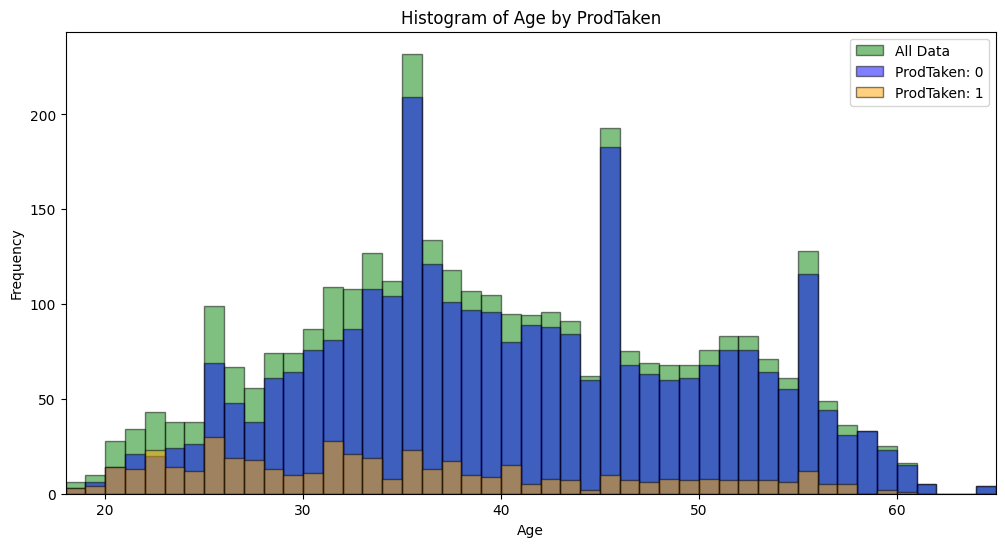

In [1236]:
plot_histograms(train_df, 'Age', bins=48)

# TypeofContact

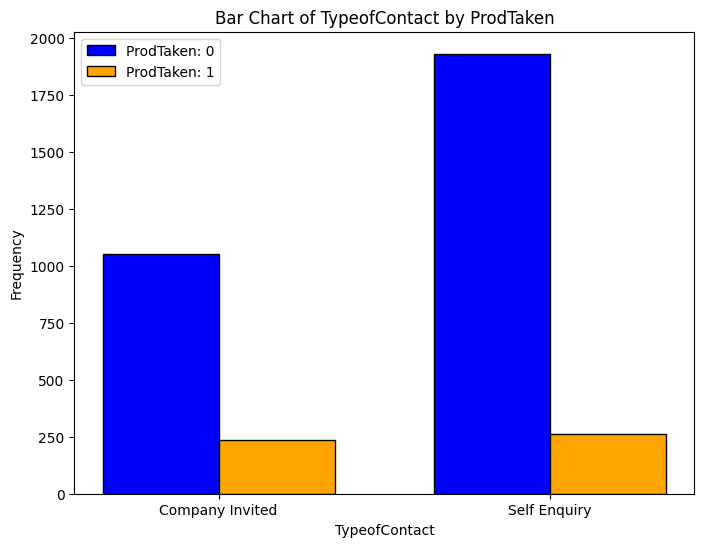

ProdTaken           0    1  ProdTaken_1_ratio
TypeofContact                                
Company Invited  1054  235           0.182312
Self Enquiry     1932  262           0.119417

In [1237]:
# TypeofContact
barplots(train_df, 'TypeofContact')
crosstab_df('TypeofContact')

In [1238]:
train_df['TypeofContact'] = train_df['TypeofContact'].fillna('Self Enquiry')
test_df['TypeofContact'] = test_df['TypeofContact'].fillna('Self Enquiry')
crosstab_df('TypeofContact')

ProdTaken           0    1  ProdTaken_1_ratio
TypeofContact                                
Company Invited  1054  235           0.182312
Self Enquiry     1938  262           0.119091

# CityTier

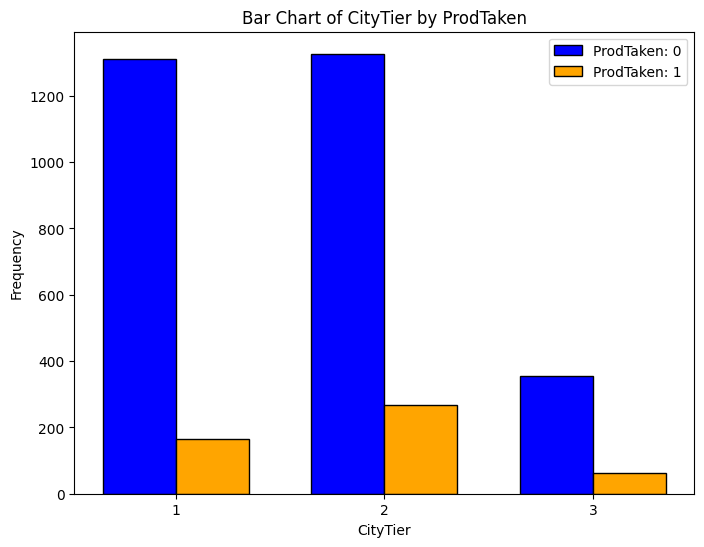

ProdTaken     0    1  ProdTaken_1_ratio
CityTier                               
1          1310  165           0.111864
2          1327  269           0.168546
3           355   63           0.150718

In [1239]:
barplots(train_df, 'CityTier')
crosstab_df('CityTier')

# DurationOfPitch

In [1240]:
train_df['DurationOfPitch'].value_counts()

DurationOfPitch
8ÂàÜ       259
9ÂàÜ       237
15ÂàÜ      216
14ÂàÜ      207
16ÂàÜ      202
10ÂàÜ      181
7ÂàÜ       170
13ÂàÜ      150
11ÂàÜ      113
12ÂàÜ      111
17ÂàÜ      100
540Áßí      90
480Áßí      79
420Áßí      69
6ÂàÜ        69
900Áßí      68
840Áßí      59
960Áßí      57
18ÂàÜ       56
780Áßí      53
600Áßí      50
660Áßí      47
720Áßí      47
32ÂàÜ       42
23ÂàÜ       37
1020Áßí     36
22ÂàÜ       34
24ÂàÜ       32
31ÂàÜ       31
25ÂàÜ       28
20ÂàÜ       28
27ÂàÜ       25
21ÂàÜ       24
33ÂàÜ       23
30ÂàÜ       22
26ÂàÜ       21
34ÂàÜ       21
1080Áßí     18
28ÂàÜ       18
19ÂàÜ       17
35ÂàÜ       17
1380Áßí     14
29ÂàÜ       12
1860Áßí     12
5ÂàÜ        12
1320Áßí     11
360Áßí      11
1920Áßí     11
1980Áßí     11
1680Áßí     11
1620Áßí     10
1500Áßí     10
1800Áßí      9
1740Áßí      8
1440Áßí      8
2100Áßí      8
2040Áßí      8
1200Áßí      8
1260Áßí      7
1560Áßí      6
300Áßí       6
2160Áßí      4
36ÂàÜ        3
4ÂàÜ         2
1140Áßí      2
Name: count, dtype: int64

In [1241]:
# Áßí„Å®ÂàÜ„ÇíÂá¶ÁêÜ„Åó„Å¶Êñ∞„Åó„ÅÑ„Ç´„É©„É†„Çí‰ΩúÊàê
def convert_duration(duration):
    if isinstance(duration, str):  # ÊñáÂ≠óÂàóÂûã„Åß„ÅÇ„Çã„Åì„Å®„ÇíÁ¢∫Ë™ç
        if 'Áßí' in duration:
            return int(duration.replace('Áßí', '')), int(duration.replace('Áßí', '')) / 60
        elif 'ÂàÜ' in duration:
            return int(duration.replace('ÂàÜ', '')) * 60, int(duration.replace('ÂàÜ', ''))
    return np.nan, np.nan  # „Åù„ÅÆ‰ªñ„ÅÆÂ†¥Âêà„ÅØ NaN „ÇíËøî„Åô

train_df['DurationOfPitch_sec'], train_df['DurationOfPitch_min'] = zip(*train_df['DurationOfPitch'].apply(convert_duration))
test_df['DurationOfPitch_sec'], test_df['DurationOfPitch_min'] = zip(*test_df['DurationOfPitch'].apply(convert_duration))
train_df[['DurationOfPitch', 'DurationOfPitch_sec', 'DurationOfPitch_min']].head()

DurationOfPitch  DurationOfPitch_sec  DurationOfPitch_min
0            900Áßí                900.0                 15.0
1             14ÂàÜ                840.0                 14.0
2             10ÂàÜ                600.0                 10.0
3           1080Áßí               1080.0                 18.0
4           1020Áßí               1020.0                 17.0

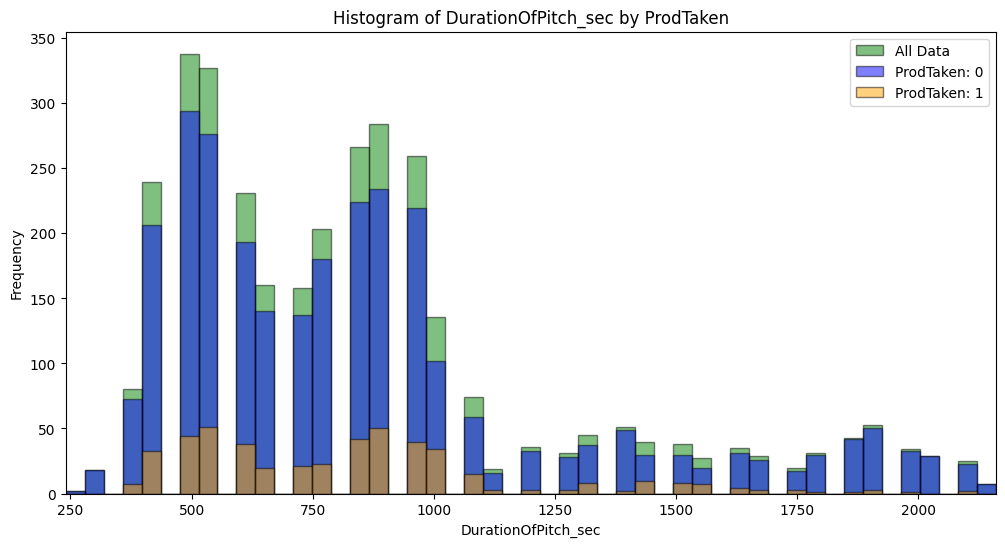

In [1242]:
plot_histograms(train_df, 'DurationOfPitch_sec', bins=50)

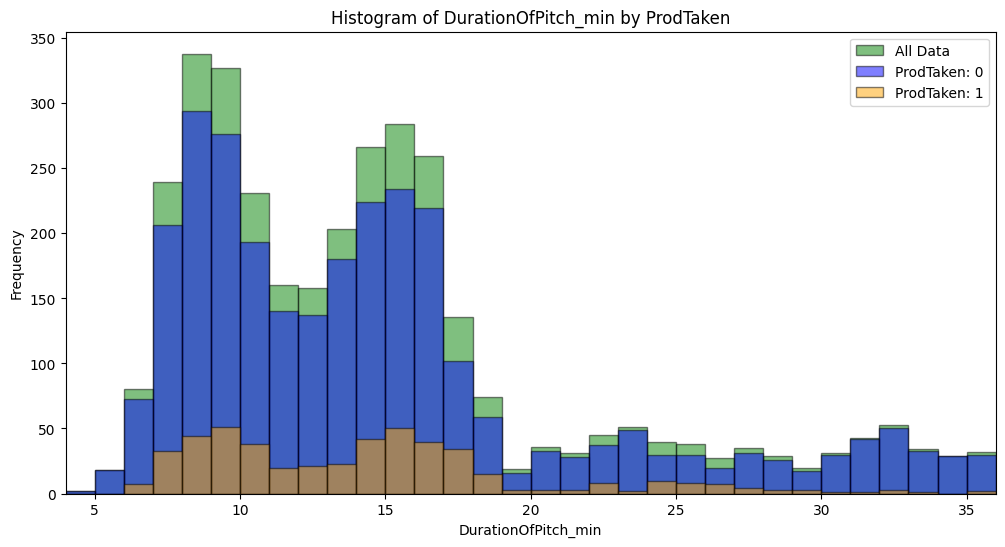

In [1243]:
plot_histograms(train_df, 'DurationOfPitch_min', bins=33)

In [1244]:
bins = [0, 10, 15, 20, 25, 30, 40]
labels = ['0-9', '10-14', '15-19', '20-24', '25-29', '30-40']

train_df['DurationOfPitch_group'] = pd.cut(train_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)
test_df['DurationOfPitch_group'] = pd.cut(test_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)

crosstab_df('DurationOfPitch_group')

ProdTaken                0    1  ProdTaken_1_ratio
DurationOfPitch_group                             
0-9                    869  135           0.134462
10-14                  874  144           0.141454
15-19                  630  142           0.183938
20-24                  177   26           0.128079
25-29                  124   25           0.167785
30-40                  214    8           0.036036

# Occupation

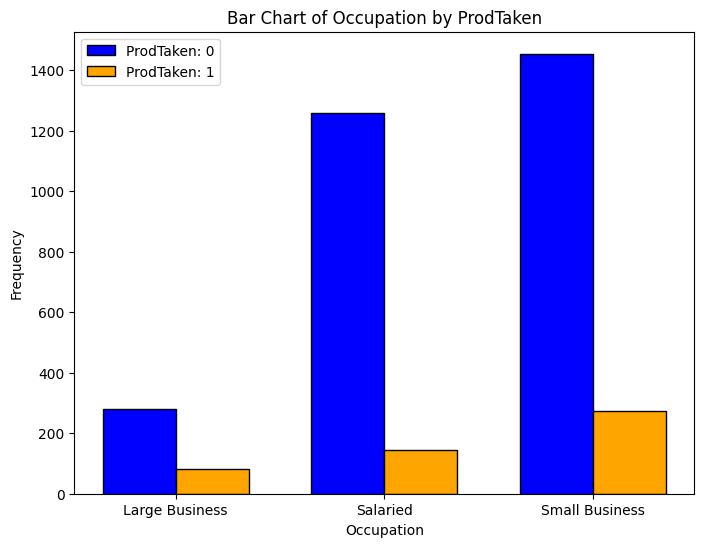

ProdTaken          0    1  ProdTaken_1_ratio
Occupation                                  
Large Business   279   82           0.227147
Salaried        1258  143           0.102070
Small Business  1455  272           0.157499

In [1245]:
barplots(train_df, 'Occupation')
crosstab_df('Occupation')

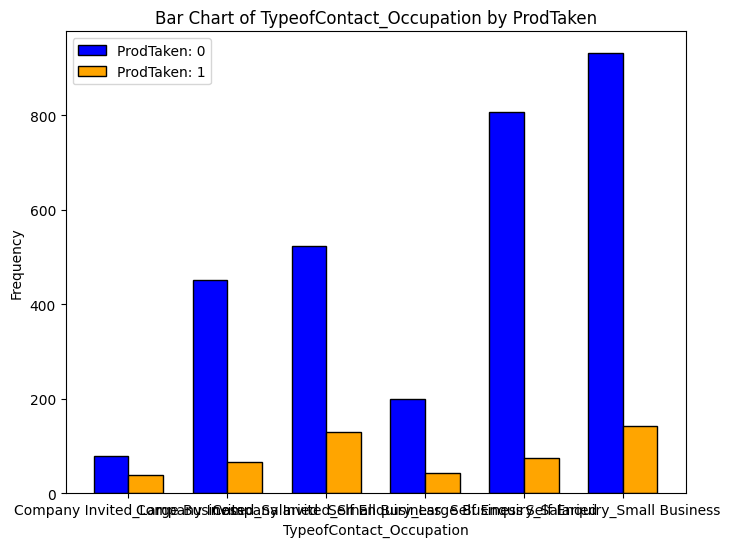

ProdTaken                         0    1  ProdTaken_1_ratio
TypeofContact_Occupation                                   
Company Invited_Large Business   79   38           0.324786
Company Invited_Salaried        451   67           0.129344
Company Invited_Small Business  524  130           0.198777
Self Enquiry_Large Business     200   44           0.180328
Self Enquiry_Salaried           807   76           0.086070
Self Enquiry_Small Business     931  142           0.132339

In [1246]:
category_and_category('TypeofContact', 'Occupation')
barplots(train_df, 'TypeofContact_Occupation')
crosstab_df('TypeofContact_Occupation')

# Gender

In [1247]:
train_df['Gender'].value_counts()

Gender
Male       1226
Female      739
male        468
female      266
MALE        183
Ôº≠ÔΩÅÔΩåÔΩÖ        126
Fe Male     109
FEMALE       99
Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ       89
ÔΩçÔΩÅÔΩåÔΩÖ         43
ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ       36
fe male      29
FE MALE      23
Ôº≠Ôº°Ôº¨Ôº•         18
Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ      15
Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•       13
ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ       6
Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•       1
Name: count, dtype: int64

In [1248]:
male_words = ['Male', 'male', 'MALE', 'Ôº≠ÔΩÅÔΩåÔΩÖ', 'ÔΩçÔΩÅÔΩåÔΩÖ', 'Ôº≠Ôº°Ôº¨Ôº•']
female_words = ['Female', 'female', 'Fe Male', 'FEMALE', 'Ôº¶ÔΩÖÔΩçÔΩÅÔΩåÔΩÖ', 'ÔΩÜÔΩÖÔΩçÔΩÅÔΩåÔΩÖ', 'fe male', 'FE MALE', 'Ôº¶Ôº•Ôº≠Ôº°Ôº¨Ôº•', 'Ôº¶ÔΩÖ„ÄÄÔº≠ÔΩÅÔΩåÔΩÖ', 'ÔΩÜÔΩÖ„ÄÄÔΩçÔΩÅÔΩåÔΩÖ', 'Ôº¶Ôº•„ÄÄÔº≠Ôº°Ôº¨Ôº•']
train_df['Gender'] = train_df['Gender'].apply(lambda x: 'Male' if x in male_words else ('Female' if x in female_words else x))
test_df['Gender'] = test_df['Gender'].apply(lambda x: 'Male' if x in male_words else ('Female' if x in female_words else x))

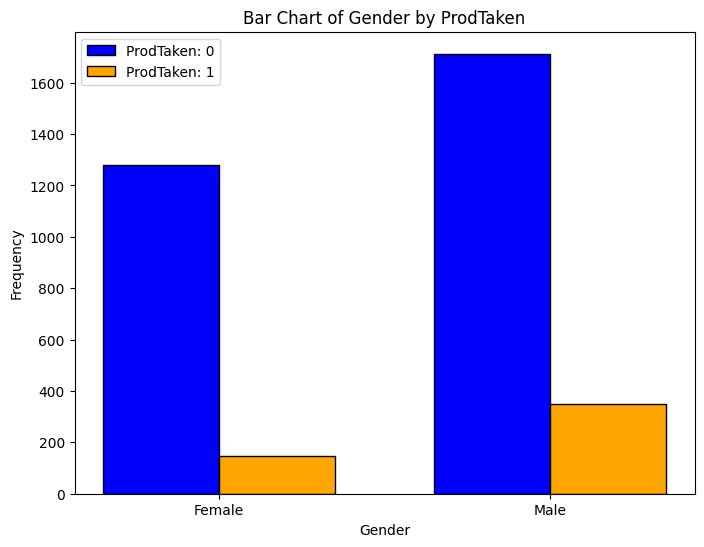

ProdTaken     0    1  ProdTaken_1_ratio
Gender                                 
Female     1279  146           0.102456
Male       1713  351           0.170058

In [1249]:
barplots(train_df, 'Gender')
crosstab_df('Gender')

# NumberOfPersonVisiting

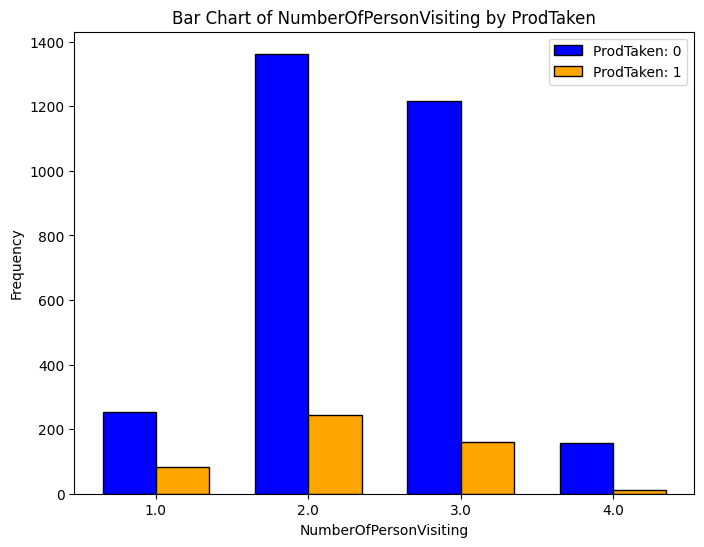

ProdTaken                  0    1  ProdTaken_1_ratio
NumberOfPersonVisiting                              
1.0                      253   83           0.247024
2.0                     1363  245           0.152363
3.0                     1218  159           0.115468
4.0                      158   10           0.059524

In [1250]:
barplots(train_df, 'NumberOfPersonVisiting')
crosstab_df('NumberOfPersonVisiting')

# NumberOfFollowups

In [1251]:
train_df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0      1396
3.0      1279
5.0       519
2.0       108
1.0        77
6.0        38
300.0      17
400.0      15
500.0       5
100.0       1
600.0       1
Name: count, dtype: int64

In [1252]:
test_df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0      1350
3.0      1257
5.0       594
2.0       104
1.0        99
6.0        31
400.0      16
300.0       8
500.0       4
100.0       1
200.0       1
Name: count, dtype: int64

In [1253]:
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(100.0, 1)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(200.0, 2)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(300.0, 3)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(400.0, 4)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(500.0, 5)
train_df['NumberOfFollowups'] = train_df['NumberOfFollowups'].replace(600.0, 6)

test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(100.0, 1)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(200.0, 2)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(300.0, 3)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(400.0, 4)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(500.0, 5)
test_df['NumberOfFollowups'] = test_df['NumberOfFollowups'].replace(600.0, 6)

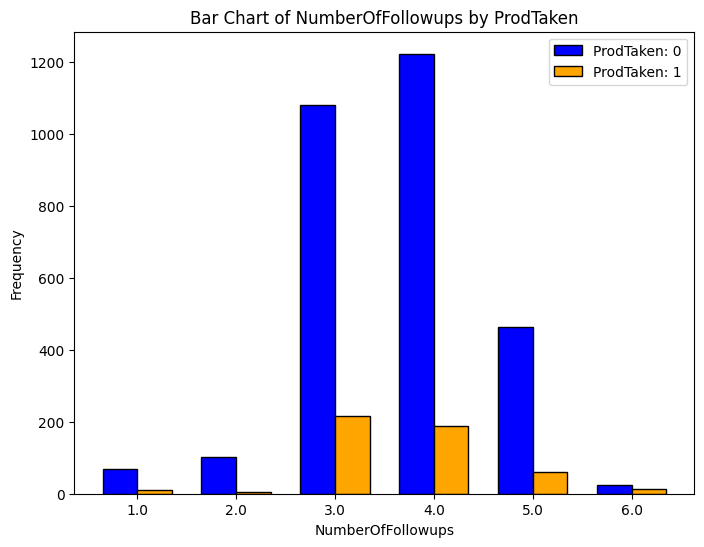

ProdTaken             0    1  ProdTaken_1_ratio
NumberOfFollowups                              
1.0                  68   10           0.128205
2.0                 102    6           0.055556
3.0                1080  216           0.166667
4.0                1222  189           0.133948
5.0                 464   60           0.114504
6.0                  25   14           0.358974

In [1254]:
barplots(train_df, 'NumberOfFollowups')
crosstab_df('NumberOfFollowups')

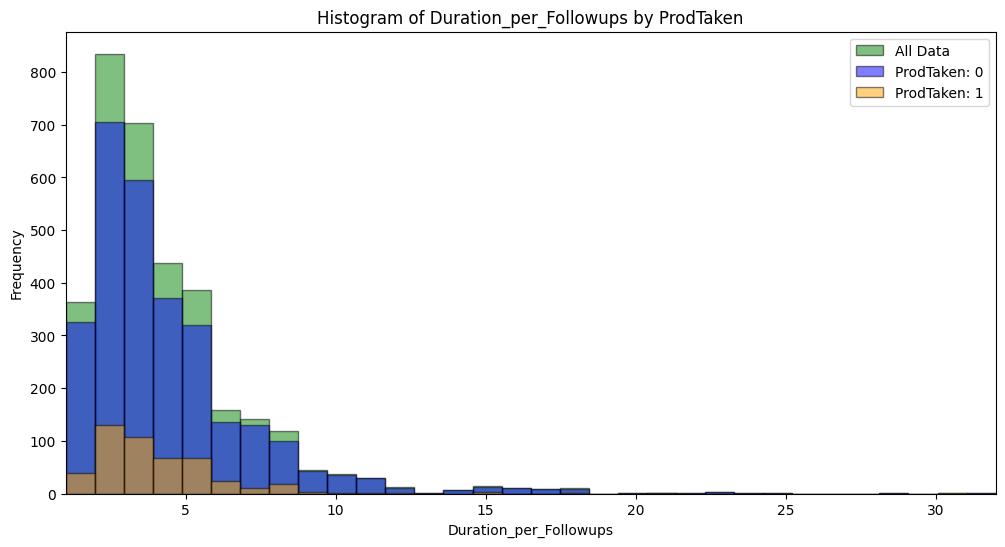

In [1255]:
train_df['Duration_per_Followups'] = train_df['DurationOfPitch_min'] / train_df['NumberOfFollowups']
test_df['Duration_per_Followups'] = test_df['DurationOfPitch_min'] / test_df['NumberOfFollowups']

plot_histograms(train_df, 'Duration_per_Followups', bins=33)

# ProductPitched

In [1256]:
train_df['ProductPitched'].value_counts()

ProductPitched
Basic           887
Deluxe          836
Standard        648
Super Deluxe    238
basic           106
BASIC           104
DELUXE           93
King             91
deluxe           88
standard         86
STANDARD         80
super deluxe     35
SUPER DELUXE     27
KING             18
Basƒ±c            15
king             14
De|uxe           12
Œíasic             9
Basiùò§             5
Delu√óe            5
Super De|uxe      4
–íasic             4
Super ·óûeluxe      4
êä°asic             4
Standùñ∫rd          3
’ètandard          3
·óûeluxe            3
Sta’∏dard          3
Basi—Å             3
Standaùò≥d          3
Basiœ≤             3
Sùòµandard          3
Standarùî°          2
Super ·é†eluxe      2
Íì¢uper Deluxe      2
–Öuper Deluxe      2
ùô≥eluxe            2
Bùñ∫sic             2
Stùñ∫ndard          2
Íì¢tandard          2
DELUXŒï            1
sta’∏dard          1
–Ötandard          1
êä°asiùò§             1
Basƒ±œ≤             1
·é†eluxe            1
Kƒ±’∏g              1
Super ùô≥eluxe      1
Ki’∏g              1
Œíasƒ±c             1
BASI–°             1
’ètandaùò≥d          1
SUPER DŒïLUXE      1
Bùñ∫siùò§             1
ŒíASI–°             1
basiœ≤             1
Kƒ±ng              1
–íùñ∫sic             1
BAÍì¢IC             1
STAN·óûARD          1
Íì¢uper De|uxe      1
BA’èIC             1
BŒëSIC             1
·é†ELUXE            1
de|u√óe            1
’èuper Deluxe      1
Œíasƒ±ùò§             1
BASŒôC             1
BaÔΩìic             1
basƒ±c             1
super de|uxe      1
de|uxe            1
ÔΩìuper deluxe      1
STANDAR·é†          1
DŒïLUXŒï            1
–ÖTANDARD          1
Name: count, dtype: int64

In [1257]:
test_df['ProductPitched'].value_counts()

ProductPitched
Basic           923
Deluxe          824
Standard        591
Super Deluxe    233
King            126
basic           112
BASIC           108
DELUXE           98
deluxe           91
STANDARD         84
standard         67
super deluxe     40
SUPER DELUXE     31
KING             17
Basƒ±c            16
king             15
De|uxe           14
–Ötandard          6
BaÔΩìic             5
Super De|uxe      5
·óûeluxe            4
Delu√óe            4
Basi—Å             3
Standùñ∫rd          3
Standaùò≥d          3
Stùñ∫ndard          3
Basiœ≤             3
Super ·é†eluxe      3
Stanùî°ard          3
·é†eluxe            3
stanùî°ard          2
Íì¢tandard          2
STŒëNDARD          2
ùô≥eluxe            2
·óûELUXE            2
Sta’∏dard          2
Super ùô≥eluxe      2
DELUXŒï            2
basiœ≤             2
Basiùò§             2
basƒ±c             1
Kƒ±ng              1
BASŒôC             1
basiùò§             1
standùñ∫rd          1
Basƒ±ùò§             1
baÔΩìic             1
Bùñ∫sic             1
BASŒô–°             1
Sùòµùñ∫ndaùò≥d          1
ki’∏g              1
standarùî°          1
Standùñ∫ùò≥d          1
Œíasic             1
·é†e|uxe            1
Bùñ∫siùò§             1
SUPŒïR ·é†ELUXE      1
Íì¢uper Deluxe      1
Basƒ±œ≤             1
Super Delu√óe      1
de|uxe            1
BaÔΩìƒ±c             1
SUPER ·óûELUXE      1
SUPER ·é†ELUXE      1
STANDAR·é†          1
Super ·óûeluxe      1
BASI–°             1
êä°asic             1
–íasic             1
basi—Å             1
BA–ÖIC             1
Name: count, dtype: int64

In [1258]:
basic_words = ['Basic', 'basic', 'BASIC', 'Basƒ±c', 'Œíasic', 'Basiùò§', '–íasic', 'êä°asic', 'Basi—Å', 'Basiœ≤', 'Bùñ∫sic', 'êä°asiùò§', 'Basƒ±œ≤', 'Œíasƒ±c', 'BASI–°', 'Bùñ∫siùò§', 'ŒíASI–°', 'basiœ≤', '–íùñ∫sic', 'BAÍì¢IC', 'BA’èIC', 'BŒëSIC', 'Œíasƒ±ùò§', 'BASŒôC', 'BaÔΩìic', 'basƒ±c', 'BASŒô–°', 'Basƒ±ùò§', 'baÔΩìic', 'basiùò§', 'BaÔΩìƒ±c', 'basi—Å', 'BA–ÖIC']
standard_words = ['Standard', 'standard', 'STANDARD', 'Standùñ∫rd', '’ètandard', 'Sta’∏dard', 'Standaùò≥d', 'Sùòµandard', 'Standarùî°', 'Stùñ∫ndard', 'Íì¢tandard', 'sta’∏dard', '–Ötandard', '’ètandaùò≥d', 'STAN·óûARD', 'STANDAR·é†', '–ÖTANDARD', 'Stanùî°ard', 'STŒëNDARD', 'stanùî°ard', 'standarùî°', 'standùñ∫rd', 'Sùòµùñ∫ndaùò≥d', 'Standùñ∫ùò≥d']
deluxe_words = ['DELUXE', 'deluxe', 'De|uxe', 'Delu√óe', '·óûeluxe', 'ùô≥eluxe', 'DELUXŒï', '·é†eluxe', '·é†ELUXE', 'de|uxe', 'DŒïLUXŒï', 'de|u√óe', '·óûELUXE', '·é†e|uxe']
superdeluxe_words = ['Super Deluxe', 'super deluxe', 'SUPER DELUXE', 'Super De|uxe', 'Super ·óûeluxe', 'Super ·é†eluxe', 'Íì¢uper Deluxe', '–Öuper Deluxe', 'Super ùô≥eluxe', 'SUPER DŒïLUXE', 'Íì¢uper De|uxe', '’èuper Deluxe', 'super de|uxe', 'ÔΩìuper deluxe', 'SUPŒïR ·é†ELUXE', 'Super Delu√óe', 'SUPER ·óûELUXE', 'SUPER ·é†ELUXE']
king_words = ['King', 'KING', 'king', 'Kƒ±’∏g', 'Ki’∏g', 'Kƒ±ng', 'ki’∏g']

train_df['ProductPitched'] = train_df['ProductPitched'].apply(lambda x: 'Basic' if x in basic_words else ('Standard' if x in standard_words else ('Deluxe' if x in deluxe_words else ('Super Deluxe' if x in superdeluxe_words else ('King' if x in king_words else x)))))
test_df['ProductPitched'] = test_df['ProductPitched'].apply(lambda x: 'Basic' if x in basic_words else ('Standard' if x in standard_words else ('Deluxe' if x in deluxe_words else ('Super Deluxe' if x in superdeluxe_words else ('King' if x in king_words else x)))))

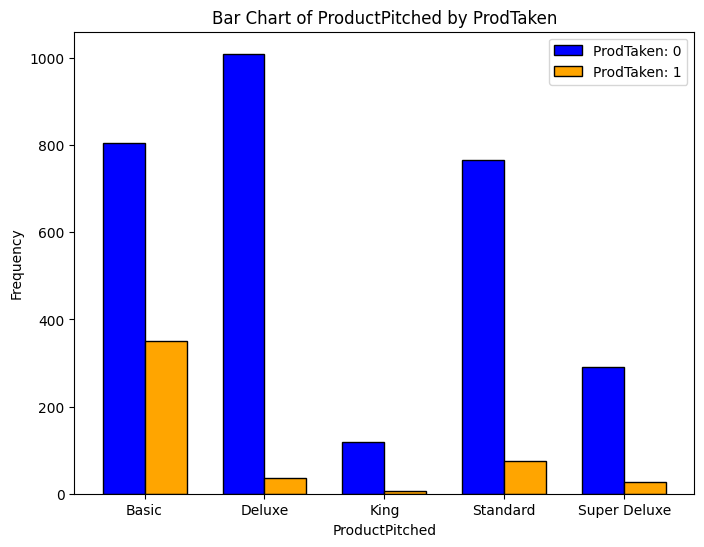

ProdTaken          0    1  ProdTaken_1_ratio
ProductPitched                              
Basic            806  351           0.303371
Deluxe          1010   35           0.033493
King             119    7           0.055556
Standard         765   76           0.090369
Super Deluxe     292   28           0.087500

In [1259]:
barplots(train_df, 'ProductPitched')
crosstab_df('ProductPitched')

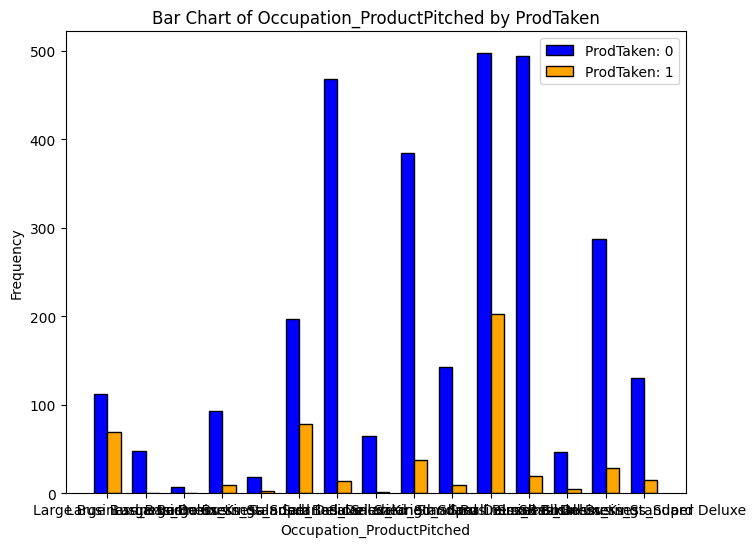

ProdTaken                      0    1  ProdTaken_1_ratio
Occupation_ProductPitched                               
Large Business_Basic         112   69           0.381215
Large Business_Deluxe         48    1           0.020408
Large Business_King            7    0           0.000000
Large Business_Standard       93    9           0.088235
Large Business_Super Deluxe   19    3           0.136364
Salaried_Basic               197   79           0.286232
Salaried_Deluxe              468   14           0.029046
Salaried_King                 65    2           0.029851
Salaried_Standard            385   38           0.089835
Salaried_Super Deluxe        143   10           0.065359
Small Business_Basic         497  203           0.290000
Small Business_Deluxe        494   20           0.038911
Small Business_King           47    5           0.096154
Small Business_Standard      287   29           0.091772
Small Business_Super Deluxe  130   15           0.103448

In [1260]:
category_and_category('Occupation', 'ProductPitched')
barplots(train_df, 'Occupation_ProductPitched')
crosstab_df('Occupation_ProductPitched')

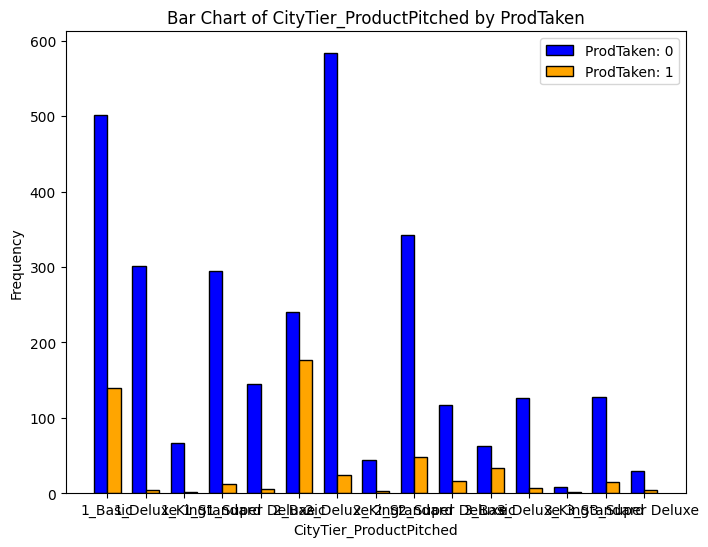

ProdTaken                  0    1  ProdTaken_1_ratio
CityTier_ProductPitched                             
1_Basic                  502  140           0.218069
1_Deluxe                 301    4           0.013115
1_King                    67    2           0.028986
1_Standard               295   13           0.042208
1_Super Deluxe           145    6           0.039735
2_Basic                  241  177           0.423445
2_Deluxe                 583   24           0.039539
2_King                    44    3           0.063830
2_Standard               342   48           0.123077
2_Super Deluxe           117   17           0.126866
3_Basic                   63   34           0.350515
3_Deluxe                 126    7           0.052632
3_King                     8    2           0.200000
3_Standard               128   15           0.104895
3_Super Deluxe            30    5           0.142857

In [1261]:
category_and_category('CityTier', 'ProductPitched')
barplots(train_df, 'CityTier_ProductPitched')
crosstab_df('CityTier_ProductPitched')

# PreferredPropertyStar

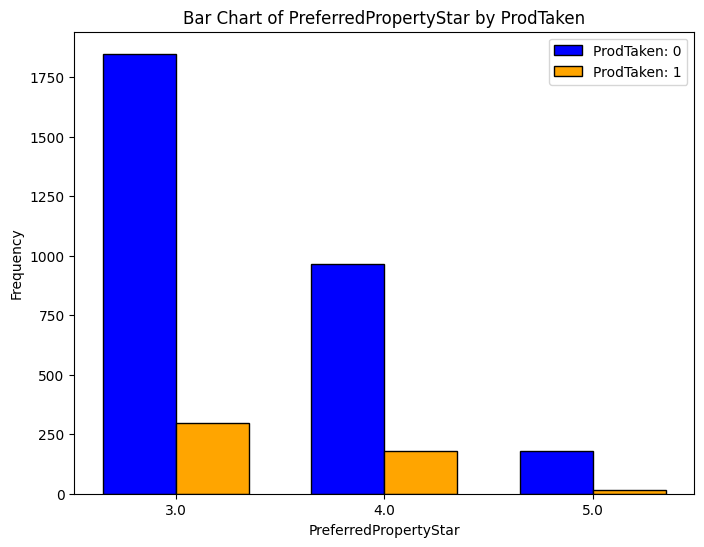

ProdTaken                 0    1  ProdTaken_1_ratio
PreferredPropertyStar                              
3.0                    1848  299           0.139264
4.0                     964  181           0.158079
5.0                     180   17           0.086294

In [1262]:
barplots(train_df, 'PreferredPropertyStar')
crosstab_df('PreferredPropertyStar')

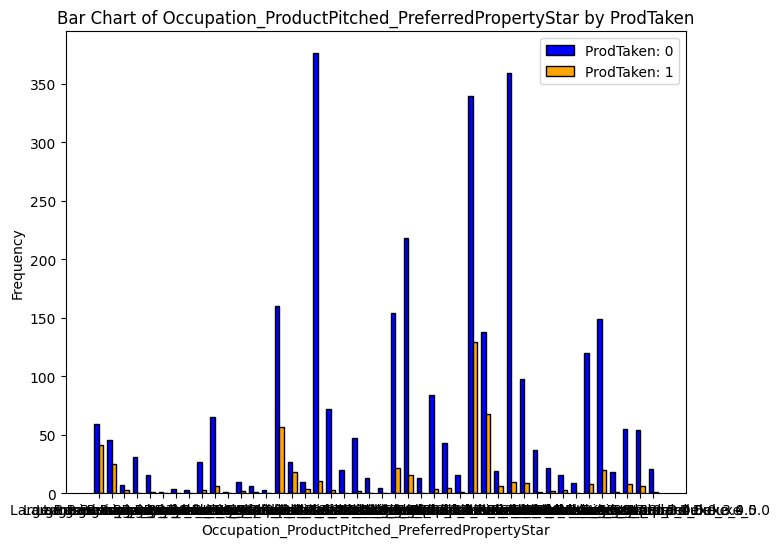

ProdTaken                                          0    1  ProdTaken_1_ratio
Occupation_ProductPitched_PreferredPropertyStar                             
Large Business_Basic_3.0                          59   41           0.410000
Large Business_Basic_4.0                          46   25           0.352113
Large Business_Basic_5.0                           7    3           0.300000
Large Business_Deluxe_3.0                         31    0           0.000000
Large Business_Deluxe_4.0                         16    1           0.058824
Large Business_Deluxe_5.0                          1    0           0.000000
Large Business_King_3.0                            4    0           0.000000
Large Business_King_4.0                            3    0           0.000000
Large Business_Standard_3.0                       27    3           0.100000
Large Business_Standard_4.0                       65    6           0.084507
Large Business_Standard_5.0                        1    0           0.000000
Large Business_Super Deluxe_3.0                   10    2           0.166667
Large Business_Super Deluxe_4.0                    6    1           0.142857
Large Business_Super Deluxe_5.0                    3    0           0.000000
Salaried_Basic_3.0                               160   57           0.262673
Salaried_Basic_4.0                                27   18           0.400000
Salaried_Basic_5.0                                10    4           0.285714
Salaried_Deluxe_3.0                              376   11           0.028424
Salaried_Deluxe_4.0                               72    3           0.040000
Salaried_Deluxe_5.0                               20    0           0.000000
Salaried_King_3.0                                 47    2           0.040816
Salaried_King_4.0                                 13    0           0.000000
Salaried_King_5.0                                  5    0           0.000000
Salaried_Standard_3.0                            154   22           0.125000
Salaried_Standard_4.0                            218   16           0.068376
Salaried_Standard_5.0                             13    0           0.000000
Salaried_Super Deluxe_3.0                         84    4           0.045455
Salaried_Super Deluxe_4.0                         43    5           0.104167
Salaried_Super Deluxe_5.0                         16    1           0.058824
Small Business_Basic_3.0                         340  129           0.275053
Small Business_Basic_4.0                         138   68           0.330097
Small Business_Basic_5.0                          19    6           0.240000
Small Business_Deluxe_3.0                        359   10           0.027100
Small Business_Deluxe_4.0                         98    9           0.084112
Small Business_Deluxe_5.0                         37    1           0.026316
Small Business_King_3.0                           22    2           0.083333
Small Business_King_4.0                           16    3           0.157895
Small Business_King_5.0                            9    0           0.000000
Small Business_Standard_3.0                      120    8           0.062500
Small Business_Standard_4.0                      149   20           0.118343
Small Business_Standard_5.0                       18    1           0.052632
Small Business_Super Deluxe_3.0                   55    8           0.126984
Small Business_Super Deluxe_4.0                   54    6           0.100000
Small Business_Super Deluxe_5.0                   21    1           0.045455

In [1263]:
category_and_category('Occupation_ProductPitched', 'PreferredPropertyStar')
barplots(train_df, 'Occupation_ProductPitched_PreferredPropertyStar')
crosstab_df('Occupation_ProductPitched_PreferredPropertyStar')

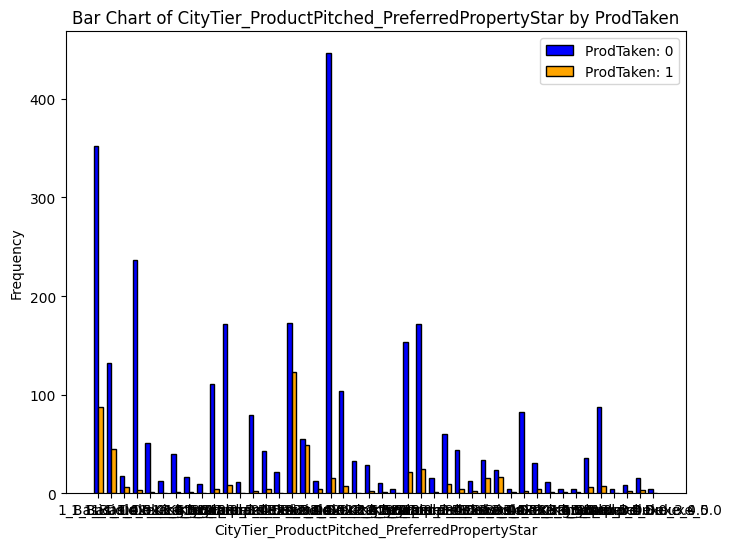

ProdTaken                                        0    1  ProdTaken_1_ratio
CityTier_ProductPitched_PreferredPropertyStar                             
1_Basic_3.0                                    352   88           0.200000
1_Basic_4.0                                    132   45           0.254237
1_Basic_5.0                                     18    7           0.280000
1_Deluxe_3.0                                   237    3           0.012500
1_Deluxe_4.0                                    51    1           0.019231
1_Deluxe_5.0                                    13    0           0.000000
1_King_3.0                                      40    1           0.024390
1_King_4.0                                      17    1           0.055556
1_King_5.0                                      10    0           0.000000
1_Standard_3.0                                 111    4           0.034783
1_Standard_4.0                                 172    9           0.049724
1_Standard_5.0                                  12    0           0.000000
1_Super Deluxe_3.0                              80    2           0.024390
1_Super Deluxe_4.0                              43    4           0.085106
1_Super Deluxe_5.0                              22    0           0.000000
2_Basic_3.0                                    173  123           0.415541
2_Basic_4.0                                     55   49           0.471154
2_Basic_5.0                                     13    5           0.277778
2_Deluxe_3.0                                   446   16           0.034632
2_Deluxe_4.0                                   104    8           0.071429
2_Deluxe_5.0                                    33    0           0.000000
2_King_3.0                                      29    2           0.064516
2_King_4.0                                      11    1           0.083333
2_King_5.0                                       4    0           0.000000
2_Standard_3.0                                 154   22           0.125000
2_Standard_4.0                                 172   25           0.126904
2_Standard_5.0                                  16    1           0.058824
2_Super Deluxe_3.0                              60   10           0.142857
2_Super Deluxe_4.0                              44    5           0.102041
2_Super Deluxe_5.0                              13    2           0.133333
3_Basic_3.0                                     34   16           0.320000
3_Basic_4.0                                     24   17           0.414634
3_Basic_5.0                                      5    1           0.166667
3_Deluxe_3.0                                    83    2           0.023529
3_Deluxe_4.0                                    31    4           0.114286
3_Deluxe_5.0                                    12    1           0.076923
3_King_3.0                                       4    1           0.200000
3_King_4.0                                       4    1           0.200000
3_Standard_3.0                                  36    7           0.162791
3_Standard_4.0                                  88    8           0.083333
3_Standard_5.0                                   4    0           0.000000
3_Super Deluxe_3.0                               9    2           0.181818
3_Super Deluxe_4.0                              16    3           0.157895
3_Super Deluxe_5.0                               5    0           0.000000

In [1264]:
category_and_category('CityTier_ProductPitched', 'PreferredPropertyStar')
barplots(train_df, 'CityTier_ProductPitched_PreferredPropertyStar')
crosstab_df('CityTier_ProductPitched_PreferredPropertyStar')

# NumberOfTrips

In [1265]:
train_df['NumberOfTrips'].value_counts()

NumberOfTrips
2         1006
3          699
5          436
1          349
7          219
Âπ¥„Å´2Âõû       141
4          141
Âπ¥„Å´3Âõû       121
6          109
Âπ¥„Å´5Âõû        79
Âπ¥„Å´1Âõû        60
Âπ¥„Å´7Âõû        37
Âπ¥„Å´6Âõû        21
Âπ¥„Å´4Âõû        19
ÂçäÂπ¥„Å´1Âõû       17
8            8
ÂõõÂçäÊúü„Å´1Âõû       3
Âπ¥„Å´8Âõû         2
Name: count, dtype: int64

In [1266]:
test_df['NumberOfTrips'].value_counts()

NumberOfTrips
2         950
3         762
5         400
1         320
7         226
Âπ¥„Å´2Âõû      153
4         136
6         125
Âπ¥„Å´3Âõû      124
Âπ¥„Å´1Âõû       72
Âπ¥„Å´5Âõû       62
Âπ¥„Å´4Âõû       31
Âπ¥„Å´7Âõû       31
Âπ¥„Å´6Âõû       26
8          12
ÂçäÂπ¥„Å´1Âõû      10
Âπ¥„Å´8Âõû        4
ÂõõÂçäÊúü„Å´1Âõû      3
Name: count, dtype: int64

In [1267]:
train_df['NumberOfTrips'] = train_df['NumberOfTrips'].replace({
    'Âπ¥„Å´1Âõû': 1, 'Âπ¥„Å´2Âõû': 2, 'Âπ¥„Å´3Âõû': 3, 'Âπ¥„Å´4Âõû': 4,
    'Âπ¥„Å´5Âõû': 5, 'Âπ¥„Å´6Âõû': 6, 'Âπ¥„Å´7Âõû': 7, 'Âπ¥„Å´8Âõû': 8,
    'ÂçäÂπ¥„Å´1Âõû': 2, 'ÂõõÂçäÊúü„Å´1Âõû': 4
}, regex=False)

train_df['NumberOfTrips'] = pd.to_numeric(train_df['NumberOfTrips'], errors='coerce')

test_df['NumberOfTrips'] = test_df['NumberOfTrips'].replace({
    'Âπ¥„Å´1Âõû': 1, 'Âπ¥„Å´2Âõû': 2, 'Âπ¥„Å´3Âõû': 3, 'Âπ¥„Å´4Âõû': 4,
    'Âπ¥„Å´5Âõû': 5, 'Âπ¥„Å´6Âõû': 6, 'Âπ¥„Å´7Âõû': 7, 'Âπ¥„Å´8Âõû': 8,
    'ÂçäÂπ¥„Å´1Âõû': 2, 'ÂõõÂçäÊúü„Å´1Âõû': 4
}, regex=False)

test_df['NumberOfTrips'] = pd.to_numeric(test_df['NumberOfTrips'], errors='coerce')

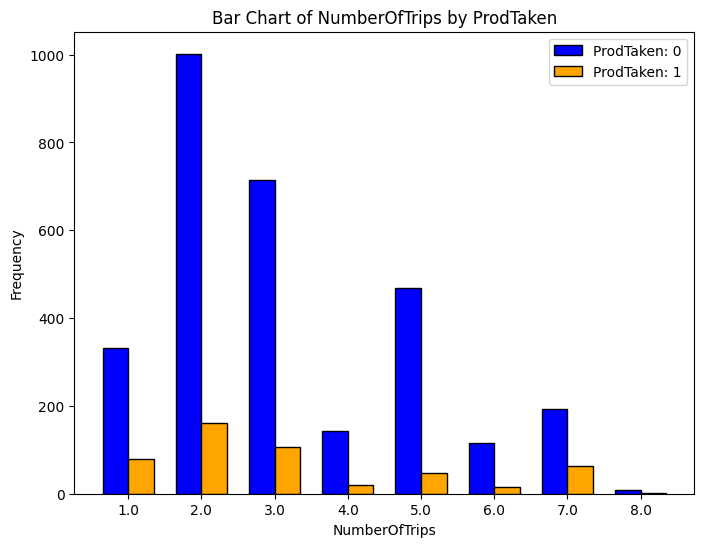

ProdTaken         0    1  ProdTaken_1_ratio
NumberOfTrips                              
1.0             331   78           0.190709
2.0            1002  162           0.139175
3.0             714  106           0.129268
4.0             142   21           0.128834
5.0             468   47           0.091262
6.0             115   15           0.115385
7.0             194   62           0.242188
8.0               8    2           0.200000

In [1268]:
barplots(train_df, 'NumberOfTrips')
crosstab_df('NumberOfTrips')

# Passport

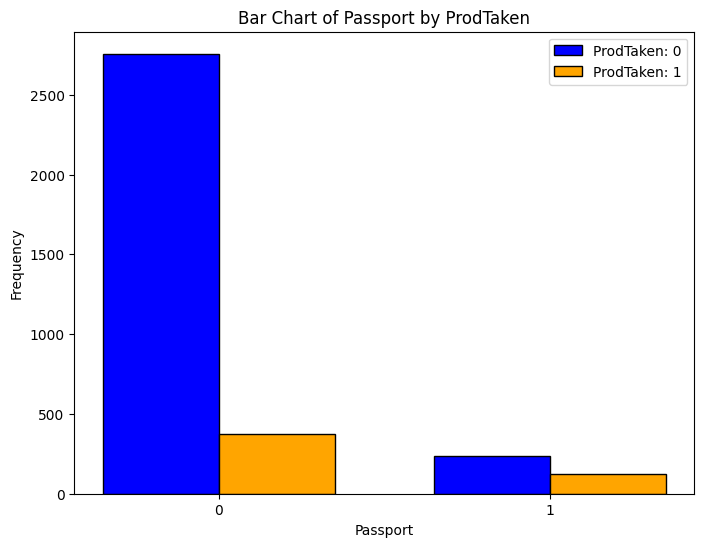

ProdTaken     0    1  ProdTaken_1_ratio
Passport                               
0          2757  374           0.119451
1           235  123           0.343575

In [1269]:
barplots(train_df, 'Passport')
crosstab_df('Passport')

# PitchSatisfactionScore

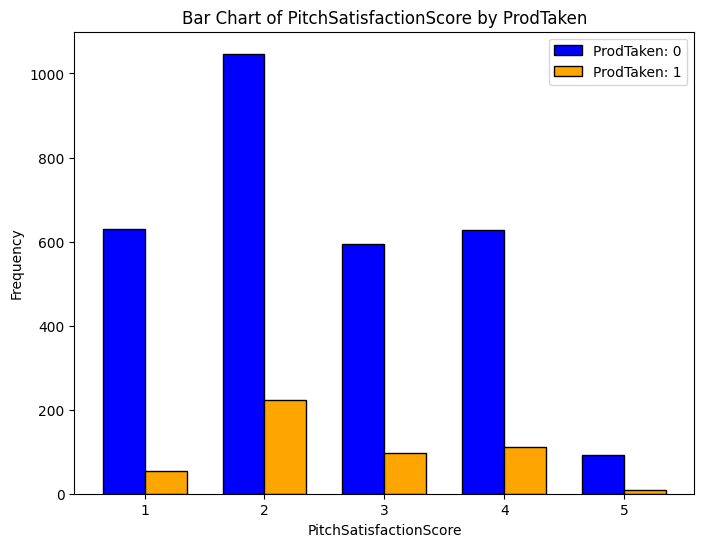

ProdTaken                  0    1  ProdTaken_1_ratio
PitchSatisfactionScore                              
1                        631   55           0.080175
2                       1047  222           0.174941
3                        594   98           0.141618
4                        627  112           0.151556
5                         93   10           0.097087

In [1270]:
barplots(train_df, 'PitchSatisfactionScore')
crosstab_df('PitchSatisfactionScore')

# Designation

In [1271]:
train_df['Designation'].value_counts()

Designation
Executive         1090
Manager           1011
Senior Manager     825
AVP                299
VP                 117
Œúanager             13
Ex–µcutive           10
Ex–µcutiv–µ            9
ManŒ±ger              8
Manag–µr              8
Executiv–µ            7
–êVP                  7
Executi—µe            6
Senior Manag–µr       6
ExecuÔΩîive            5
Senior ManŒ±ger       4
MŒ±nager              4
ŒëVP                  3
Ex–µcuti—µ–µ            3
Manageùôß              3
–ïxecutive            3
S–µnior Manager       3
Senior MŒ±nŒ±ger       3
Ex–µcÔΩïtive            2
Senior Manageùôß       2
’èenior Manager       2
VÔº∞                   2
–ï√ó–µcutive            2
E√óecutive            2
MŒ±nageùôß              2
AVÔº∞                  2
Executi—µ–µ            2
MŒ±nŒ±ger              2
–Öenior Manager       2
–ïxecutiv–µ            2
S–µnior Manag–µr       1
E√óecÔΩïtive            1
MŒ±nag–µr              1
Ex–µcÔΩïtiv–µ            1
–ïx–µcutiv–µ            1
Senior MŒ±nager       1
Œúanag–µr              1
ManŒ±g–µr              1
ExecÔΩïtive            1
–Öenior ManŒ±ger       1
E√ó–µcuti—µe            1
’èenior Œúanager       1
Œúanageùôß              1
Senioùôß Manager       1
Senior Manag–µùôß       1
–ïxecuÔΩîive            1
Senior ŒúanŒ±ger       1
–ï√óecutive            1
Name: count, dtype: int64

In [1272]:
test_df['Designation'].value_counts()

Designation
Executive         1129
Manager           1016
Senior Manager     740
AVP                305
VP                 142
Ex–µcutiv–µ           10
Manag–µr             10
Executiv–µ            9
Ex–µcutive            9
MŒ±nager              9
ManŒ±ger              8
ŒëVP                  8
–êVP                  7
Executi—µe            7
Senior Manag–µr       6
Senioùôß Manager       5
–ïxecutive            5
Manageùôß              5
Œúanager              5
S–µnior Manager       4
VÔº∞                   3
ExecÔΩïtive            3
Senior Manageùôß       3
Senior Œúanager       2
–Öenior Manager       2
Senior ManŒ±ger       2
AVÔº∞                  2
’èenior Manager       2
E√óecutive            2
ŒúŒ±nager              2
MŒ±nŒ±ger              2
ExecÔΩïtiv–µ            1
S–µnioùôß Manager       1
Ex–µcÔΩïtiv–µ            1
MŒ±nŒ±g–µr              1
S–µnior Manag–µr       1
–êVÔº∞                  1
Senior MŒ±nŒ±ger       1
Senior Manag–µùôß       1
MŒ±nag–µr              1
–ïxecÔΩïtive            1
Senioùôß Manageùôß       1
Senioùôß MŒ±nageùôß       1
ExecuÔΩîive            1
S–µnior Manag–µùôß       1
Senioùôß Manag–µr       1
’èenior Œúanager       1
Manag–µùôß              1
ExecÔΩïÔΩîive            1
ManŒ±g–µr              1
ŒúŒ±nag–µr              1
Ex–µcuÔΩîive            1
–Öenior Œúanageùôß       1
ŒëVÔº∞                  1
Senioùôß ManŒ±ger       1
Senior MŒ±nager       1
Name: count, dtype: int64

In [1273]:
maneger_words = ['Manager', 'Œúanager', 'ManŒ±ger', 'Manag–µr', 'MŒ±nager', 'Manageùôß', 'MŒ±nageùôß', 'MŒ±nŒ±ger', 'MŒ±nag–µr', 'Œúanag–µr', 'ManŒ±g–µr', 'Œúanageùôß', 'ŒúŒ±nager', 'MŒ±nŒ±g–µr', 'ŒúŒ±nag–µr', 'Manag–µùôß']
seniormanager_words = ['Senior Manager', 'Senior Manag–µr', 'Senior ManŒ±ger', 'S–µnior Manager', 'Senior MŒ±nŒ±ger', 'Senior Manageùôß', '’èenior Manager', '–Öenior Manager', 'S–µnior Manag–µr', 'Senior MŒ±nager', '–Öenior ManŒ±ger', '’èenior Œúanager', 'Senior ŒúanŒ±ger', 'Senior Manag–µùôß', 'Senioùôß Manager', 'Senior Œúanager', 'Senioùôß MŒ±nageùôß', 'S–µnior Manag–µùôß', 'Senioùôß Manag–µr', '–Öenior Œúanageùôß', 'Senioùôß ManŒ±ger', 'Senioùôß Manageùôß', 'S–µnioùôß Manager']
executive_words = ['Executive', 'Ex–µcutive', 'Ex–µcutiv–µ', 'Executiv–µ', 'Executi—µe', 'ExecuÔΩîive', 'Ex–µcuti—µ–µ', '–ïxecutive', 'Ex–µcÔΩïtive', '–ï√ó–µcutive', 'E√óecutive', 'Executi—µ–µ', '–ïxecutiv–µ', 'E√óecÔΩïtive', '–ïxecuÔΩîive', 'E√ó–µcuti—µe', 'ExecÔΩïtive', 'Ex–µcÔΩïtiv–µ', '–ïx–µcutiv–µ', '–ï√óecutive', 'Ex–µcuÔΩîive', 'ExecÔΩïÔΩîive', 'ExecÔΩïtiv–µ', '–ïxecÔΩïtive']
avp_words = ['AVP', '–êVP', 'ŒëVP', 'AVÔº∞', 'ŒëVÔº∞', '–êVÔº∞']
vp_words= ['VP', 'VÔº∞']

train_df['Designation'] = train_df['Designation'].apply(lambda x: 'Manager' if x in maneger_words else ('Senior Manager' if x in seniormanager_words else ('Executive' if x in executive_words else ('AVP' if x in avp_words else ('VP' if x in vp_words else x)))))
test_df['Designation'] = test_df['Designation'].apply(lambda x: 'Manager' if x in maneger_words else ('Senior Manager' if x in seniormanager_words else ('Executive' if x in executive_words else ('AVP' if x in avp_words else ('VP' if x in vp_words else x)))))

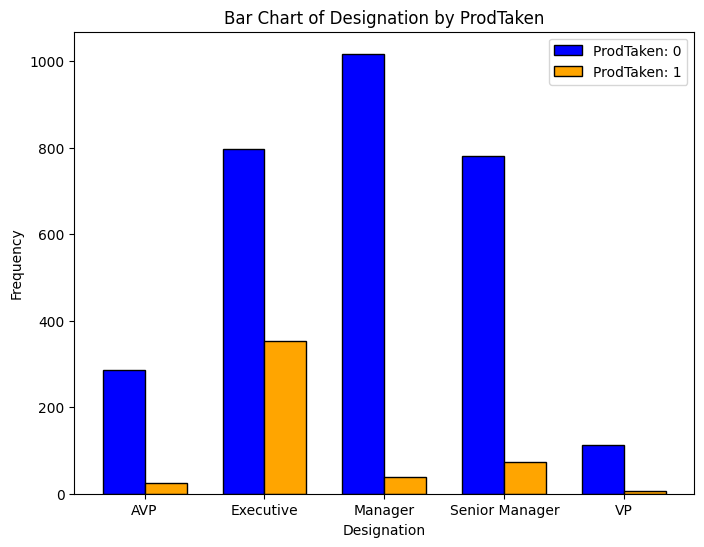

ProdTaken          0    1  ProdTaken_1_ratio
Designation                                 
AVP              287   24           0.077170
Executive        796  354           0.307826
Manager         1017   38           0.036019
Senior Manager   780   74           0.086651
VP               112    7           0.058824

In [1274]:
barplots(train_df, 'Designation')
crosstab_df('Designation')

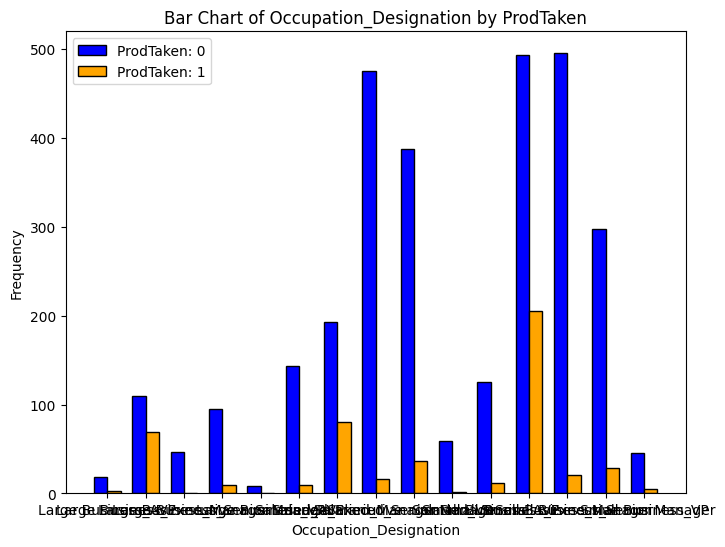

ProdTaken                        0    1  ProdTaken_1_ratio
Occupation_Designation                                    
Large Business_AVP              19    3           0.136364
Large Business_Executive       110   69           0.385475
Large Business_Manager          47    1           0.020833
Large Business_Senior Manager   95    9           0.086538
Large Business_VP                8    0           0.000000
Salaried_AVP                   143    9           0.059211
Salaried_Executive             193   80           0.293040
Salaried_Manager               475   16           0.032587
Salaried_Senior Manager        388   36           0.084906
Salaried_VP                     59    2           0.032787
Small Business_AVP             125   12           0.087591
Small Business_Executive       493  205           0.293696
Small Business_Manager         495   21           0.040698
Small Business_Senior Manager  297   29           0.088957
Small Business_VP               45    5           0.100000

In [1275]:
category_and_category('Occupation', 'Designation')
barplots(train_df, 'Occupation_Designation')
crosstab_df('Occupation_Designation')

# MonthlyIncome

In [1276]:
train_df['MonthlyIncome'].head(10)

0    253905.0
1    404475.0
2    278145.0
3    326805.0
4    258435.0
5    ÊúàÂèé26.0‰∏áÂÜÜ
6    453180.0
7    261900.0
8    247800.0
9    257610.0
Name: MonthlyIncome, dtype: object

In [1277]:
def convert_numeric(monthlyincome):
    # Êï∞ÂÄ§Âûã„Åæ„Åü„ÅØÊï∞ÂÄ§„Å®„Åó„Å¶Ë°®Áèæ„Åï„Çå„ÅüÊñáÂ≠óÂàó„ÅÆÂ†¥Âêà
    try:
        # Êï∞ÂÄ§Âûã„ÇÑ„ÄÅÊï∞ÂÄ§„ÇíË°®„ÅôÊñáÂ≠óÂàóÔºà‰æã: '300000'Ôºâ„ÅÆÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæÊï∞ÂÄ§Âûã„Å´Â§âÊèõ
        return float(monthlyincome)
    except (ValueError, TypeError):
        pass  # Êï∞ÂÄ§„Å®„Åó„Å¶Â§âÊèõ„Åß„Åç„Å™„ÅÑÂ†¥Âêà„ÅØÊ¨°„ÅÆÂá¶ÁêÜ„Å∏

    # ÊñáÂ≠óÂàóÂûã„ÅßÁâπÊÆä„Å™„Éï„Ç©„Éº„Éû„ÉÉ„Éà„ÅÆÂ†¥Âêà
    if isinstance(monthlyincome, str):
        if 'ÊúàÂèé' in monthlyincome:
            monthlyincome = monthlyincome.replace('ÊúàÂèé', '').replace('‰∏áÂÜÜ', '').strip()
            return int(float(monthlyincome) * 10000)
        elif '‰∏áÂÜÜ' in monthlyincome:
            monthlyincome = monthlyincome.replace('‰∏áÂÜÜ', '').strip()
            return int(float(monthlyincome) * 10000)

    # „Åù„ÅÆ‰ªñ„ÅÆÂ†¥Âêà„ÅØ NaN „ÇíËøî„Åô
    return np.nan

train_df['MonthlyIncome'] = train_df['MonthlyIncome'].apply(convert_numeric)
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].apply(convert_numeric)


In [1278]:
train_df['MonthlyIncome'].head(10)

0    253905.0
1    404475.0
2    278145.0
3    326805.0
4    258435.0
5    260000.0
6    453180.0
7    261900.0
8    247800.0
9    257610.0
Name: MonthlyIncome, dtype: float64

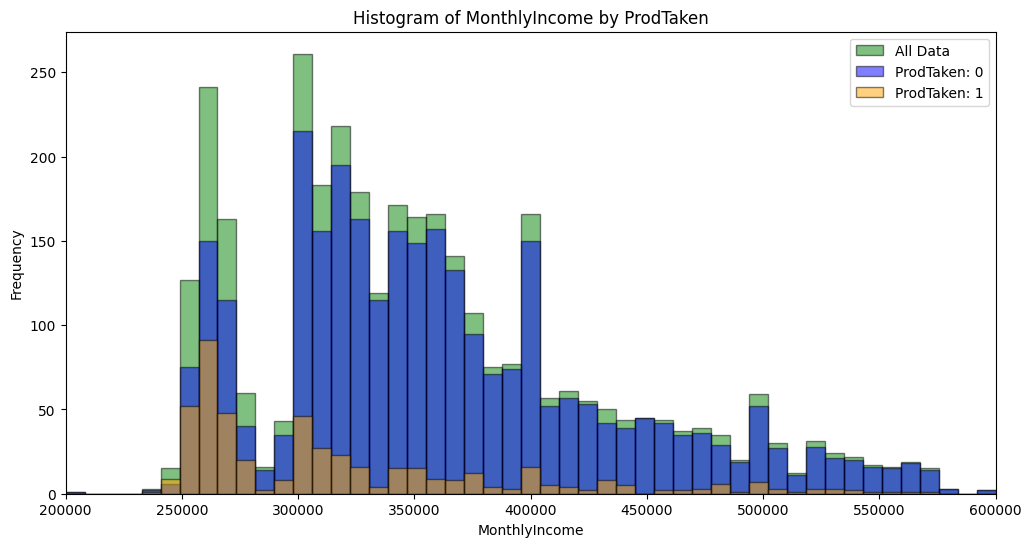

In [1279]:
plot_histograms(train_df, 'MonthlyIncome', bins=50)

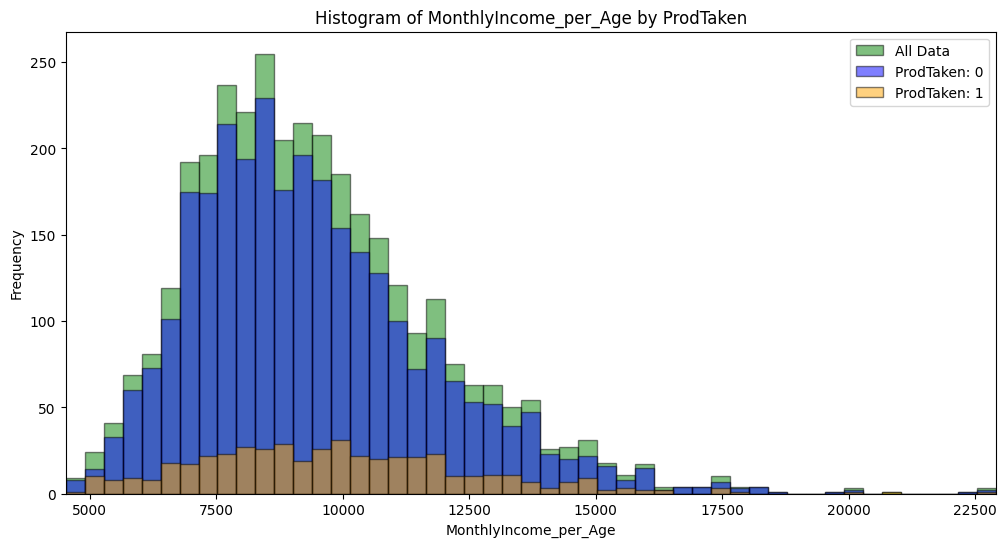

In [1280]:
train_df['MonthlyIncome_per_Age'] = train_df['MonthlyIncome'] / train_df['Age']
test_df['MonthlyIncome_per_Age'] = test_df['MonthlyIncome'] / test_df['Age']

plot_histograms(train_df, 'MonthlyIncome_per_Age', bins=50)

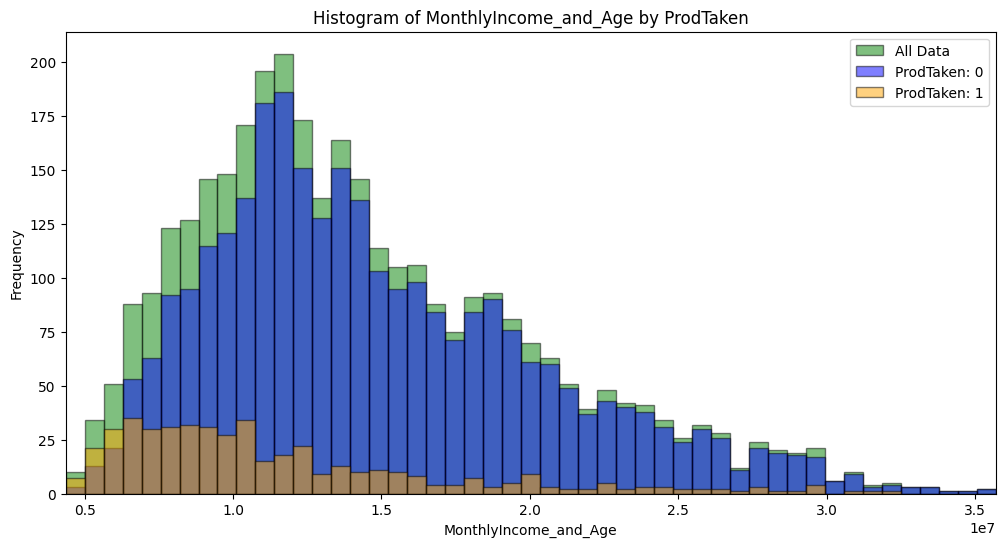

In [1281]:
train_df['MonthlyIncome_and_Age'] = train_df['MonthlyIncome'] * train_df['Age']
test_df['MonthlyIncome_and_Age'] = test_df['MonthlyIncome'] * test_df['Age']

plot_histograms(train_df, 'MonthlyIncome_and_Age', bins=50)

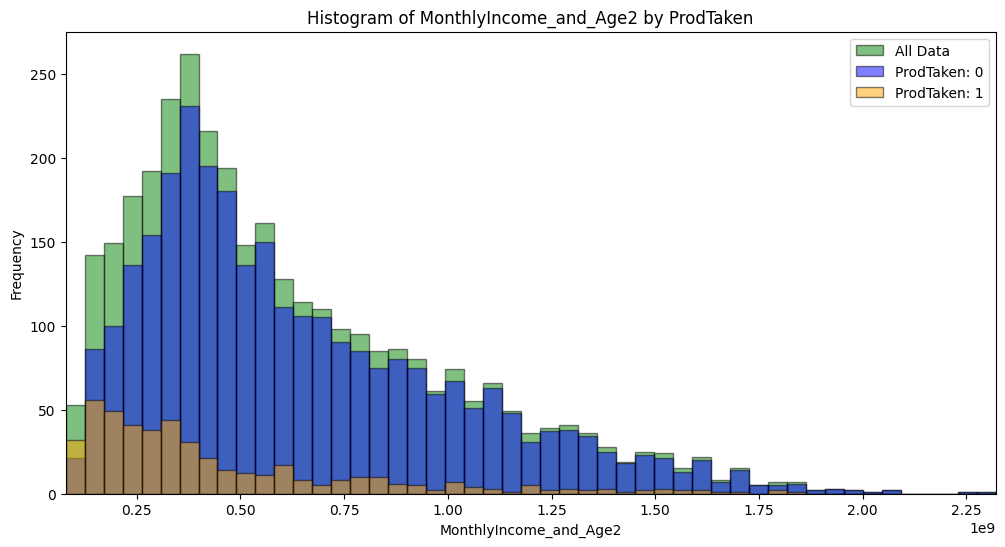

In [1282]:
train_df['MonthlyIncome_and_Age2'] = train_df['MonthlyIncome'] * train_df['Age'] * train_df['Age']
test_df['MonthlyIncome_and_Age2'] = test_df['MonthlyIncome'] * test_df['Age'] * test_df['Age']

plot_histograms(train_df, 'MonthlyIncome_and_Age2', bins=50)

# customer_info

In [1283]:
train_df['customer_info'].value_counts().head(20)

customer_info
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫      34
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫       31
ÁµêÂ©öÊ∏à„Åø„ÄÅËá™ÂãïËªäÊú™ÊâÄÊúâ„ÄÅÂ≠ê‰æõ1‰∫∫    20
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫      20
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫       19
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó       18
Êú™Â©ö„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ1‰∫∫        18
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó      17
Èõ¢Â©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ1‰∫∫       16
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅ„Åì„Å©„ÇÇ1‰∫∫      16
ÁµêÂ©öÊ∏à„Åø ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ1‰∫∫      16
ÁµêÂ©öÊ∏à„Åø/ËªäÊú™ÊâÄÊåÅ/Â≠ê‰æõ1‰∫∫      15
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊú™ÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫      15
Èõ¢Â©öÊ∏à„Åø ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ1‰∫∫      15
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ „Åì„Å©„ÇÇ1‰∫∫      14
ÁµêÂ©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ2‰∫∫       14
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ1‰∫∫       13
ÁµêÂ©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó       13
Áã¨Ë∫´„ÄÅËªäÊâÄÊåÅ„ÄÅÂ≠ê‰æõ„Å™„Åó         13
Èõ¢Â©öÊ∏à„Åø„ÄÅËªäÊâÄÊåÅ„ÄÅ„Åì„Å©„ÇÇ1‰∫∫      12
Name: count, dtype: int64

In [1284]:
# 'customer_info' „Ç´„É©„É†„ÇíÂàÜËß£
# ÂàÜÂâ≤Âá¶ÁêÜ
def split_info(info):
    # ÊúÄÂàù„ÅÆ2„Å§„ÅÆË¶ÅÁ¥†„Å®„ÄÅ„Åù„Çå‰ª•Èôç„ÇíÂàÜÂâ≤
    parts = info.split(' ', 2)  # 2 „Å§ÁõÆ„ÅÆË¶ÅÁ¥†„Åæ„ÅßÂàÜÂâ≤„Åó„ÄÅ„Åù„Çå‰ª•Èôç„Çí„Åæ„Å®„ÇÅ„Çã
    if len(parts) == 3:
        return parts[0], parts[1], parts[2]
    elif len(parts) == 2:
        return parts[0], parts[1], ''  # 3„Å§ÁõÆ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑÂ†¥Âêà„ÄÅÁ©∫ÊñáÂ≠óÂàó„ÇíËøî„Åô
    elif len(parts) == 1:
        return parts[0], '', ''  # 2„Å§ÁõÆ„Å®3„Å§ÁõÆ„ÅåÂ≠òÂú®„Åó„Å™„ÅÑÂ†¥Âêà
    return '', '', ''  # ‰∏á„Åå‰∏Ä‰Ωï„ÇÇ„Å™„ÅÑÂ†¥Âêà

train_df['customer_info'] = (
    train_df['customer_info']
    .str.replace('„ÄÅ', ' ', regex=False)
    .str.replace(',', ' ', regex=False)
    .str.replace('/', ' ', regex=False)
    .str.replace('Ôºè', ' ', regex=False)
    .str.replace('\n', ' ', regex=False)
    .str.replace('\t', ' ', regex=False)
    .str.replace('„ÄÄ', ' ', regex=False)
)
train_df[['MaritalStatus', 'CarOwnership', 'Children']] = train_df['customer_info'].apply(lambda x: pd.Series(split_info(x)))

test_df['customer_info'] = (
    test_df['customer_info']
    .str.replace('„ÄÅ', ' ', regex=False)
    .str.replace(',', ' ', regex=False)
    .str.replace('/', ' ', regex=False)
    .str.replace('Ôºè', ' ', regex=False)
    .str.replace('\n', ' ', regex=False)
    .str.replace('\t', ' ', regex=False)
    .str.replace('„ÄÄ', ' ', regex=False)
)
test_df[['MaritalStatus', 'CarOwnership', 'Children']] = test_df['customer_info'].apply(lambda x: pd.Series(split_info(x)))

# ÁµêÊûú„ÇíÁ¢∫Ë™ç
train_df[['customer_info', 'MaritalStatus', 'CarOwnership', 'Children']].head()

customer_info MaritalStatus CarOwnership Children
0      Êú™Â©ö ËªäÊú™ÊâÄÊåÅ Â≠ê‰æõ„Å™„Åó            Êú™Â©ö         ËªäÊú™ÊâÄÊåÅ     Â≠ê‰æõ„Å™„Åó
1     Èõ¢Â©öÊ∏à„Åø Ëªä„ÅÇ„Çä Â≠ê‰æõÁÑ°„Åó          Èõ¢Â©öÊ∏à„Åø          Ëªä„ÅÇ„Çä     Â≠ê‰æõÁÑ°„Åó
2  ÁµêÂ©öÊ∏à„Åø Ëá™ÂãïËªäÊú™ÊâÄÊúâ Â≠ê‰æõ„Å™„Åó          ÁµêÂ©öÊ∏à„Åø       Ëá™ÂãïËªäÊú™ÊâÄÊúâ     Â≠ê‰æõ„Å™„Åó
3     Èõ¢Â©öÊ∏à„Åø ËªäÊâÄÊåÅ Â≠ê‰æõÁÑ°„Åó          Èõ¢Â©öÊ∏à„Åø          ËªäÊâÄÊåÅ     Â≠ê‰æõÁÑ°„Åó
4         Áã¨Ë∫´ ËªäÊâÄÊåÅ ÁÑ°Â≠ê            Áã¨Ë∫´          ËªäÊâÄÊåÅ       ÁÑ°Â≠ê

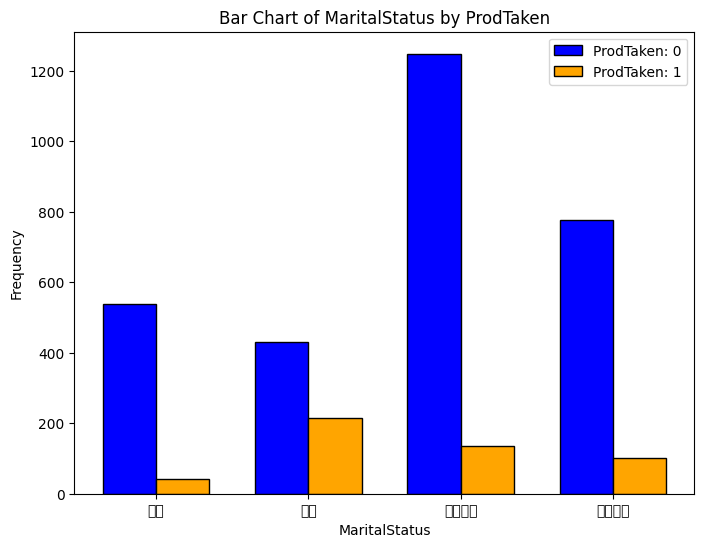

ProdTaken         0    1  ProdTaken_1_ratio
MaritalStatus                              
Êú™Â©ö              538   43           0.074010
Áã¨Ë∫´              430  216           0.334365
ÁµêÂ©öÊ∏à„Åø           1248  136           0.098266
Èõ¢Â©öÊ∏à„Åø            776  102           0.116173

In [1285]:
barplots(train_df, 'MaritalStatus')
crosstab_df('MaritalStatus')

In [1286]:
train_df['Family_num1'] = train_df['MaritalStatus'].apply(lambda x: 2 if x == 'ÁµêÂ©öÊ∏à„Åø' else 1)
test_df['Family_num1'] = test_df['MaritalStatus'].apply(lambda x : 2 if x == 'ÁµêÂ©öÊ∏à„Åø' else 1)

In [1287]:
car_words = ['ËªäÊâÄÊåÅ', 'Ëá™ÂãïËªäÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„ÅÇ„Çä', '‰πóÁî®ËªäÊâÄÊåÅ', 'Ëªä‰øùÊúâ', 'Ëªä„ÅÇ„Çä']
noncar_words = ['ËªäÊú™ÊâÄÊåÅ', 'Ëá™ÂãïËªäÊú™ÊâÄÊúâ', 'Ëá™ÂÆ∂Áî®Ëªä„Å™„Åó', '‰πóÁî®Ëªä„Å™„Åó', 'Ëªä‰øùÊúâ„Å™„Åó', 'Ëªä„Å™„Åó']

train_df['CarOwnership'] = train_df['CarOwnership'].apply(lambda x: 'Car' if x in car_words else ('Non-Car' if x in noncar_words else x))
test_df['CarOwnership'] = test_df['CarOwnership'].apply(lambda x: 'Car' if x in car_words else ('Non-Car' if x in noncar_words else x))

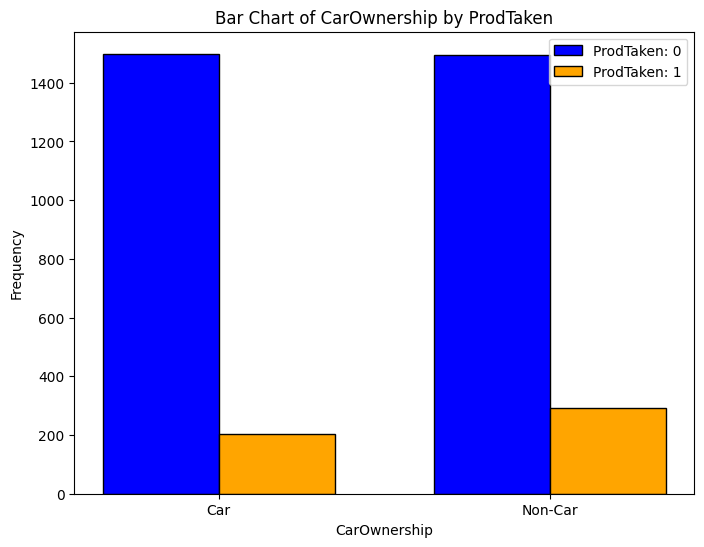

ProdTaken        0    1  ProdTaken_1_ratio
CarOwnership                              
Car           1499  205           0.120305
Non-Car       1493  292           0.163585

In [1288]:
barplots(train_df, 'CarOwnership')
crosstab_df('CarOwnership')

In [1289]:
train_df['Children'].value_counts()

Children
Â≠ê‰æõ1‰∫∫        859
Â≠ê‰æõ„Å™„Åó        539
Â≠ê‰æõ2‰∫∫        434
„Åì„Å©„ÇÇ1‰∫∫       410
Â≠ê‰æõÁÑ°„Åó        252
„Åì„Å©„ÇÇ2‰∫∫       229
1ÂÖê          113
Â≠ê‰æõÊúâ„Çä(1‰∫∫)     94
Â≠ê‰æõÊúâ„Çä 1‰∫∫      94
Â≠ê‰æõ„Çº„É≠         75
ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠        62
Â≠ê‰æõÊúâ„Çä 2‰∫∫      61
ÁÑ°Â≠ê           57
2ÂÖê           51
Â≠ê‰æõÊúâ„Çä(2‰∫∫)     49
Â≠ê‰æõ3‰∫∫         35
„Åì„Å©„ÇÇ3‰∫∫        20
Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé       13
3ÂÖê           10
‰∏çÊòé           10
Â≠ê‰æõÊúâ„Çä 3‰∫∫       5
„Çè„Åã„Çâ„Å™„ÅÑ         5
Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé       5
Â≠ê„ÅÆÊï∞‰∏çË©≥         4
Â≠ê‰æõÊúâ„Çä(3‰∫∫)      3
Name: count, dtype: int64

In [1290]:
train_df['Children'].value_counts().sum()

3489

In [1291]:
test_df['Children'].value_counts()

Children
Â≠ê‰æõ1‰∫∫        840
Â≠ê‰æõ„Å™„Åó        499
Â≠ê‰æõ2‰∫∫        487
„Åì„Å©„ÇÇ1‰∫∫       422
Â≠ê‰æõÁÑ°„Åó        255
„Åì„Å©„ÇÇ2‰∫∫       227
1ÂÖê          107
Â≠ê‰æõÊúâ„Çä(1‰∫∫)    100
Â≠ê‰æõÊúâ„Çä 1‰∫∫      95
Â≠ê‰æõÊúâ„Çä(2‰∫∫)     66
ÁÑ°Â≠ê           64
Â≠ê‰æõÊúâ„Çä 2‰∫∫      60
2ÂÖê           57
ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠        56
Â≠ê‰æõ„Çº„É≠         50
Â≠ê‰æõ3‰∫∫         35
Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé       26
„Åì„Å©„ÇÇ3‰∫∫        18
‰∏çÊòé            7
Â≠ê‰æõÊúâ„Çä 3‰∫∫       6
3ÂÖê            4
Â≠ê‰æõÊúâ„Çä(3‰∫∫)      4
Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé       3
Â≠ê„ÅÆÊï∞‰∏çË©≥         1
Name: count, dtype: int64

In [1292]:
test_df['Children'].value_counts().sum()

3489

In [1293]:
onechild_words = ['Â≠ê‰æõ1‰∫∫', '„Åì„Å©„ÇÇ1‰∫∫', '1ÂÖê', 'Â≠ê‰æõÊúâ„Çä(1‰∫∫)', 'Â≠ê‰æõÊúâ„Çä 1‰∫∫']
twochildren_words = ['Â≠ê‰æõ2‰∫∫', '„Åì„Å©„ÇÇ2‰∫∫', 'Â≠ê‰æõÊúâ„Çä 2‰∫∫', '2ÂÖê', 'Â≠ê‰æõÊúâ„Çä(2‰∫∫)']
threechildren_words = ['Â≠ê‰æõ3‰∫∫', '„Åì„Å©„ÇÇ3‰∫∫', '3ÂÖê', 'Â≠ê‰æõÊúâ„Çä 3‰∫∫', 'Â≠ê‰æõÊúâ„Çä(3‰∫∫)']
unknown_words = ['Â≠ê‰æõ„ÅÆÊï∞‰∏çÊòé', '‰∏çÊòé', '„Çè„Åã„Çâ„Å™„ÅÑ', 'Â≠êËÇ≤„Å¶Áä∂Ê≥Å‰∏çÊòé', 'Â≠ê„ÅÆÊï∞‰∏çË©≥']
nonchild_words = ['Â≠ê‰æõ„Å™„Åó', 'Â≠ê‰æõÁÑ°„Åó', 'Â≠ê‰æõ„Çº„É≠', 'ÈùûËÇ≤ÂÖêÂÆ∂Â∫≠', 'ÁÑ°Â≠ê']

train_df['Children'] = train_df['Children'].apply(lambda x: 1 if x in onechild_words else (2 if x in twochildren_words else (3 if x in threechildren_words else (np.nan if x in unknown_words else (0 if x in nonchild_words else x)))))
test_df['Children'] = test_df['Children'].apply(lambda x: 1 if x in onechild_words else (2 if x in twochildren_words else (3 if x in threechildren_words else (np.nan if x in unknown_words else (0 if x in nonchild_words else x)))))

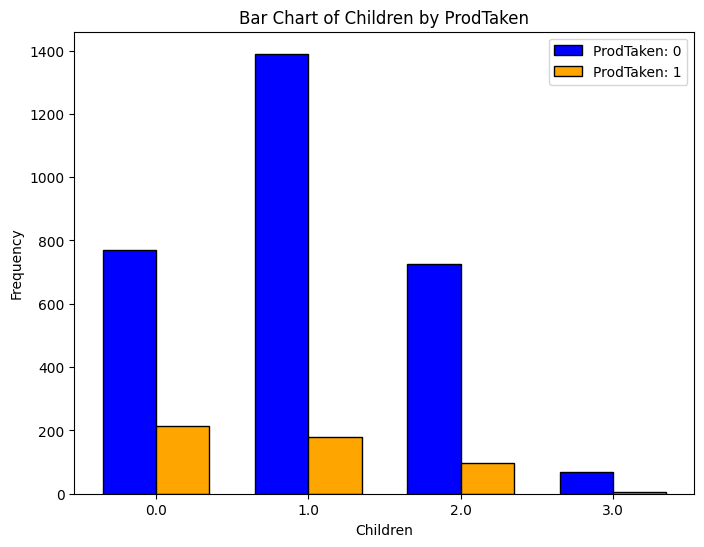

ProdTaken     0    1  ProdTaken_1_ratio
Children                               
0.0         771  214           0.217259
1.0        1390  180           0.114650
2.0         726   98           0.118932
3.0          68    5           0.068493

In [1294]:
barplots(train_df, 'Children')
crosstab_df('Children')

In [1295]:
def fill_children(row):
    if pd.isna(row['Children']):  # Children „ÅåÊ¨†ÊêçÂÄ§„ÅÆÂ†¥Âêà
        if row['MaritalStatus'] in ['Êú™Â©ö', 'Áã¨Ë∫´', 'Èõ¢Â©öÊ∏à„Åø']:
            return 0
        else:
            return 1
    return row['Children']  # Ê¨†ÊêçÂÄ§„Åß„Å™„ÅÑÂ†¥Âêà„ÅØ„Åù„ÅÆ„Åæ„ÅæËøî„Åô

# ÂêÑË°å„Å´ÈÅ©Áî®
train_df['Children'] = train_df.apply(fill_children, axis=1)
test_df['Children'] = test_df.apply(fill_children, axis=1)

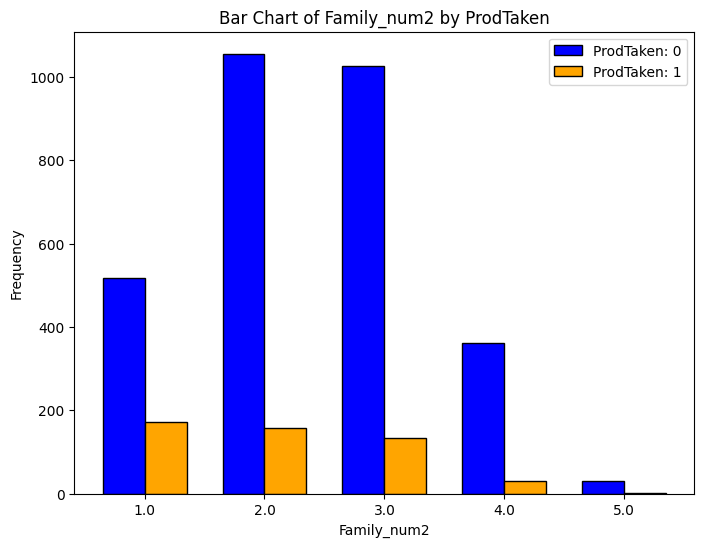

ProdTaken       0    1  ProdTaken_1_ratio
Family_num2                              
1.0           518  172           0.249275
2.0          1056  158           0.130148
3.0          1026  134           0.115517
4.0           361   31           0.079082
5.0            31    2           0.060606

In [1296]:
train_df['Family_num2'] = train_df['Family_num1'] + train_df['Children']
test_df['Family_num2'] = test_df['Family_num1'] + test_df['Children']

barplots(train_df, 'Family_num2')
crosstab_df('Family_num2')

# Ê¨†ÊêçÂÄ§‰∫àÊ∏¨

In [1297]:
train_df['Age'] = train_df['Age'].astype(float)
test_df['Age'] = test_df['Age'].astype(float)

In [1298]:
for col in train_df.columns:
  if train_df[col].dtypes == 'object':
    train_df[col] = train_df[col].astype('category')

for col in test_df.columns:
  if test_df[col].dtypes == 'object':
    test_df[col] = test_df[col].astype('category')

In [1299]:
features_for_age = [
    'TypeofContact', 'CityTier', 'Occupation', 'Gender',
    'NumberOfPersonVisiting', 'ProductPitched',
    'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore',
    'Designation',  'MaritalStatus', 'CarOwnership', 'Family_num2',
]
x_train_age = train_df[features_for_age]
y_train_age = train_df['Age']
x_test_age = test_df[features_for_age]
y_test_age = train_df['Age']

params = {
    "objective": "regression",  # ÂõûÂ∏∞„Çø„Çπ„ÇØ
    "random_state": 123,       # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„ÅÆ‰π±Êï∞„Ç∑„Éº„Éâ
    "n_estimators": 100,       # Ê±∫ÂÆöÊú®„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„Éà100Ôºâ
    "learning_rate": 0.1       # Â≠¶ÁøíÁéáÔºà„Éá„Éï„Ç©„É´„Éà0.1Ôºâ
}


model = lgb.LGBMRegressor(**params)  # Âπ¥ÈΩ¢„ÅØÈÄ£Á∂öÂÄ§„Å™„ÅÆ„ÅßÂõûÂ∏∞„É¢„Éá„É´„Çí‰ΩøÁî®
model.fit(
    x_train_age, y_train_age,
    eval_set=[(x_train_age, y_train_age)],
    callbacks=[
        lgb.callback.early_stopping(stopping_rounds=50),
        lgb.callback.log_evaluation(period=10)
    ]
)

# Ê¨†ÊêçÂÄ§„Çí‰∫àÊ∏¨
predicted_train_ages = np.round(model.predict(x_train_age))  # train „ÅÆÊ¨†ÊêçÂÄ§
predicted_test_ages = np.round(model.predict(x_test_age))    # test „ÅÆÊ¨†ÊêçÂÄ§



# Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Çã
train_df.loc[train_df['Age'].isna(), 'Age'] = predicted_train_ages[train_df['Age'].isna()]
test_df.loc[test_df['Age'].isna(), 'Age'] = predicted_test_ages[test_df['Age'].isna()]
print(train_df['Age'].isna().sum())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 3489, number of used features: 13
[LightGBM] [Info] Start training from score 38.298366
[10]	training's l2: 104.634
[20]	training's l2: 96.9552
[30]	training's l2: 92.8353
[40]	training's l2: 89.1276
[50]	training's l2: 86.329
[60]	training's l2: 84.03
[70]	training's l2: 82.1984
[80]	training's l2: 80.3979
[90]	training's l2: 78.7245
[100]	training's l2: 76.6445
0


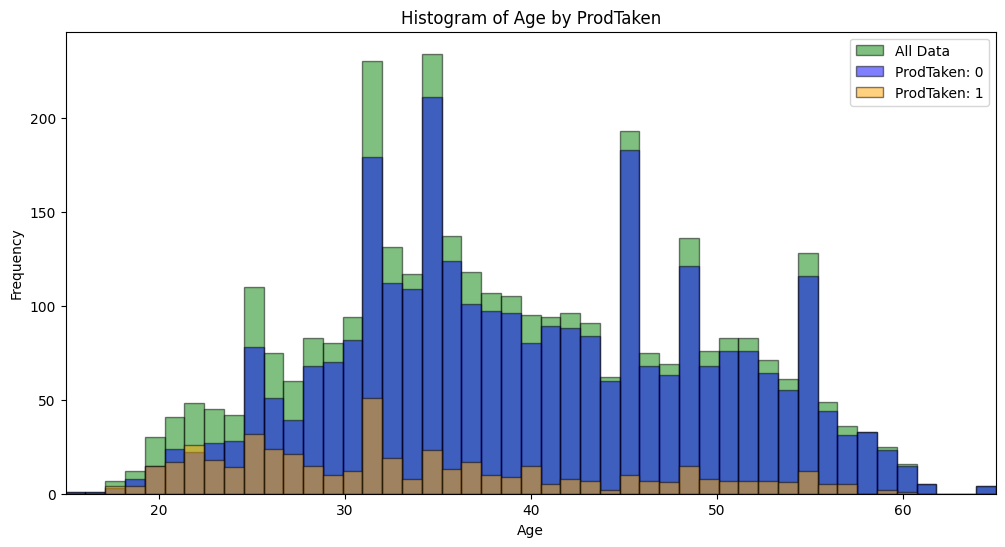

In [1300]:
plot_histograms(train_df, 'Age', bins=48)

In [1301]:
bins = [10, 20, 25, 30, 35, 40, 60, 70]
labels = ['10-19', '20-24', '25-29', '30-34', '35-39', '40-59', '60-69']

train_df['Age_group'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['Age_group'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

crosstab_df('Age_group')

ProdTaken     0    1  ProdTaken_1_ratio
Age_group                              
10-19        13    8           0.380952
20-24       116   90           0.436893
25-29       306  102           0.250000
30-34       482   90           0.157343
35-39       629   72           0.102710
40-59      1422  134           0.086118
60-69        24    1           0.040000

In [1302]:
# Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Åü„ÅÆ„Åß„ÄÅ„ÇÇ„ÅÜ‰∏ÄÂ∫¶‰ΩúÊàê
train_df['MonthlyIncome_and_Age'] = train_df['MonthlyIncome'] * train_df['Age']
test_df['MonthlyIncome_and_Age'] = test_df['MonthlyIncome'] * test_df['Age']

In [1303]:
train_df['DurationOfPitch_min'] = train_df['DurationOfPitch_min'].astype(float)
test_df['DurationOfPitch_min'] = test_df['DurationOfPitch_min'].astype(float)

features_for_duration = [
    'TypeofContact', 'CityTier', 'Occupation', 'Gender',
    'NumberOfPersonVisiting', 'ProductPitched',
    'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore',
    'Designation',  'MaritalStatus', 'CarOwnership', 'Family_num2',
]
x_train_age = train_df[features_for_age]
y_train_age = train_df['DurationOfPitch_min']
x_test_age = test_df[features_for_age]
y_test_age = train_df['DurationOfPitch_min']

params = {
    "objective": "regression",  # ÂõûÂ∏∞„Çø„Çπ„ÇØ
    "random_state": 123,       # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„ÅÆ‰π±Êï∞„Ç∑„Éº„Éâ
    "n_estimators": 100,       # Ê±∫ÂÆöÊú®„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„Éà100Ôºâ
    "learning_rate": 0.1       # Â≠¶ÁøíÁéáÔºà„Éá„Éï„Ç©„É´„Éà0.1Ôºâ
}


model = lgb.LGBMRegressor(**params)  # Âπ¥ÈΩ¢„ÅØÈÄ£Á∂öÂÄ§„Å™„ÅÆ„ÅßÂõûÂ∏∞„É¢„Éá„É´„Çí‰ΩøÁî®
model.fit(
    x_train_age, y_train_age,
    eval_set=[(x_train_age, y_train_age)],
    callbacks=[
        lgb.callback.early_stopping(stopping_rounds=50),
        lgb.callback.log_evaluation(period=10)
    ]
)

# Ê¨†ÊêçÂÄ§„Çí‰∫àÊ∏¨
predicted_train_ages = np.round(model.predict(x_train_age))  # train „ÅÆÊ¨†ÊêçÂÄ§
predicted_test_ages = np.round(model.predict(x_test_age))    # test „ÅÆÊ¨†ÊêçÂÄ§



# Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Çã
train_df.loc[train_df['DurationOfPitch_min'].isna(), 'DurationOfPitch_min'] = predicted_train_ages[train_df['DurationOfPitch_min'].isna()]
test_df.loc[test_df['DurationOfPitch_min'].isna(), 'DurationOfPitch_min'] = predicted_test_ages[test_df['DurationOfPitch_min'].isna()]
print(train_df['DurationOfPitch_min'].isna().sum())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 3489, number of used features: 13
[LightGBM] [Info] Start training from score 13.847234
[10]	training's l2: 47.0761
[20]	training's l2: 44.2101
[30]	training's l2: 42.4957
[40]	training's l2: 41.408
[50]	training's l2: 40.3212
[60]	training's l2: 39.4936
[70]	training's l2: 38.32
[80]	training's l2: 37.3047
[90]	training's l2: 36.4839
[100]	training's l2: 35.7677
0


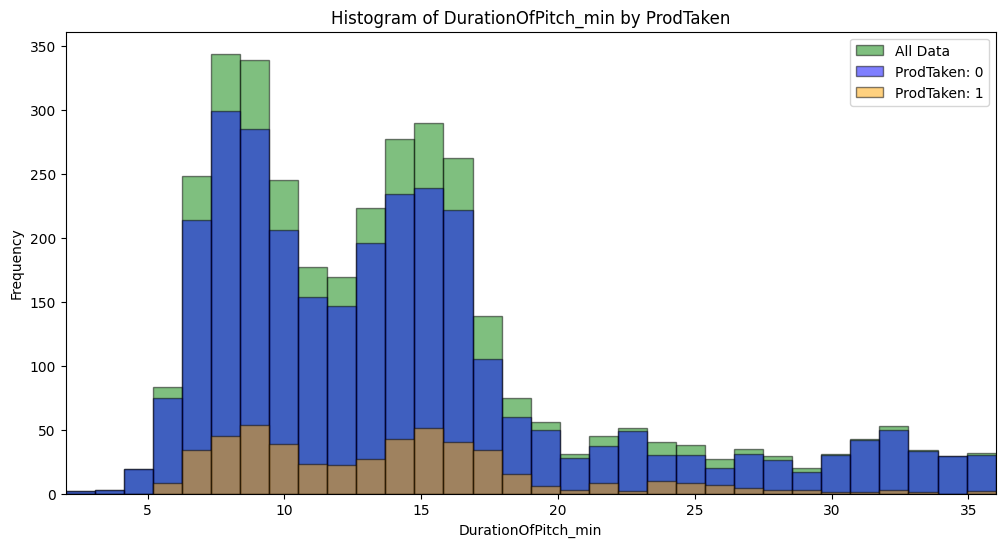

In [1304]:
plot_histograms(train_df, 'DurationOfPitch_min', bins=33)

In [1305]:
bins = [0, 6, 16, 21, 31, 40]
labels = ['0-5', '6-15', '16-20', '21-30', '31-40']

train_df['DurationOfPitch_group'] = pd.cut(train_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)
test_df['DurationOfPitch_group'] = pd.cut(test_df['DurationOfPitch_min'], bins=bins, labels=labels, right=False)

crosstab_df('DurationOfPitch_group')

ProdTaken                 0    1  ProdTaken_1_ratio
DurationOfPitch_group                              
0-5                      24    0           0.000000
6-15                   2049  346           0.144468
16-20                   437   95           0.178571
21-30                   298   49           0.141210
31-40                   184    7           0.036649

In [1306]:
train_df['MonthlyIncome'] = train_df['MonthlyIncome'].astype(float)
test_df['MonthlyIncome'] = test_df['MonthlyIncome'].astype(float)

features_for_income = [
    'TypeofContact', 'CityTier', 'Occupation', 'Gender',
    'NumberOfPersonVisiting', 'ProductPitched',
    'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore',
    'Designation',  'MaritalStatus', 'CarOwnership', 'Family_num2',
]
x_train_age = train_df[features_for_age]
y_train_age = train_df['MonthlyIncome']
x_test_age = test_df[features_for_age]
y_test_age = train_df['MonthlyIncome']

params = {
    "objective": "regression",  # ÂõûÂ∏∞„Çø„Çπ„ÇØ
    "random_state": 123,       # ÂÜçÁèæÊÄß„ÅÆ„Åü„ÇÅ„ÅÆ‰π±Êï∞„Ç∑„Éº„Éâ
    "n_estimators": 100,       # Ê±∫ÂÆöÊú®„ÅÆÊï∞Ôºà„Éá„Éï„Ç©„É´„Éà100Ôºâ
    "learning_rate": 0.1       # Â≠¶ÁøíÁéáÔºà„Éá„Éï„Ç©„É´„Éà0.1Ôºâ
}


model = lgb.LGBMRegressor(**params)  # Âπ¥ÈΩ¢„ÅØÈÄ£Á∂öÂÄ§„Å™„ÅÆ„ÅßÂõûÂ∏∞„É¢„Éá„É´„Çí‰ΩøÁî®
model.fit(
    x_train_age, y_train_age,
    eval_set=[(x_train_age, y_train_age)],
    callbacks=[
        lgb.callback.early_stopping(stopping_rounds=50),
        lgb.callback.log_evaluation(period=10)
    ]
)

# Ê¨†ÊêçÂÄ§„Çí‰∫àÊ∏¨
predicted_train_ages = np.round(model.predict(x_train_age))  # train „ÅÆÊ¨†ÊêçÂÄ§
predicted_test_ages = np.round(model.predict(x_test_age))    # test „ÅÆÊ¨†ÊêçÂÄ§



# Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Çã
train_df.loc[train_df['MonthlyIncome'].isna(), 'MonthlyIncome'] = predicted_train_ages[train_df['MonthlyIncome'].isna()]
test_df.loc[test_df['MonthlyIncome'].isna(), 'MonthlyIncome'] = predicted_test_ages[test_df['MonthlyIncome'].isna()]
print(train_df['MonthlyIncome'].isna().sum())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 3489, number of used features: 13
[LightGBM] [Info] Start training from score 349962.685583
[10]	training's l2: 3.92256e+09
[20]	training's l2: 3.30583e+09
[30]	training's l2: 3.11161e+09
[40]	training's l2: 3.00494e+09
[50]	training's l2: 2.90011e+09
[60]	training's l2: 2.81437e+09
[70]	training's l2: 2.73957e+09
[80]	training's l2: 2.67269e+09
[90]	training's l2: 2.60806e+09
[100]	training's l2: 2.54383e+09
0


In [1307]:
# Ê¨†ÊêçÂÄ§„ÇíÂüã„ÇÅ„Åü„ÅÆ„Åß„ÄÅ„ÇÇ„ÅÜ‰∏ÄÂ∫¶‰ΩúÊàê
train_df['MonthlyIncome_and_Age'] = train_df['MonthlyIncome'] * train_df['Age']
test_df['MonthlyIncome_and_Age'] = test_df['MonthlyIncome'] * test_df['Age']

# „Éá„Éº„Çø„Çª„ÉÉ„Éà

In [1308]:
for col in train_df.columns:
  if train_df[col].dtypes == 'object':
    train_df[col] = train_df[col].astype('category')

for col in test_df.columns:
  if test_df[col].dtypes == 'object':
    test_df[col] = test_df[col].astype('category')

In [1309]:
def trans_category(features_trans_cat):
  for col in features_trans_cat:
    train_df[col] = train_df[col].astype('category')
    test_df[col] = test_df[col].astype('category')

features_trans_cat = [
    'Passport'
                      ]

trans_category(features_trans_cat)

In [1310]:
information_df(train_df)

(index, col) : (3489, 37)


dtypes  NaN Count  Nunique  \
id                                                  int64          0     3489   
Age                                               float64          0       47   
TypeofContact                                    category          0        2   
CityTier                                            int64          0        3   
DurationOfPitch                                  category        121       65   
Occupation                                       category          0        3   
Gender                                           category          0        2   
NumberOfPersonVisiting                            float64          0        4   
NumberOfFollowups                                 float64         33        6   
ProductPitched                                   category          0        5   
PreferredPropertyStar                             float64          0        3   
NumberOfTrips                                     float64         22        8   
Passport                                         category          0        2   
PitchSatisfactionScore                              int64          0        5   
Designation                                      category          0        5   
MonthlyIncome                                     float64          0     2597   
customer_info                                    category          0      606   
ProdTaken                                           int64          0        2   
DurationOfPitch_sec                               float64        121       33   
DurationOfPitch_min                               float64          0       34   
DurationOfPitch_group                            category          0        5   
TypeofContact_Occupation                         category          0        6   
Duration_per_Followups                            float64        150      112   
Occupation_ProductPitched                        category          0       15   
CityTier_ProductPitched                          category          0       15   
Occupation_ProductPitched_PreferredPropertyStar  category          0       44   
CityTier_ProductPitched_PreferredPropertyStar    category          0       44   
Occupation_Designation                           category          0       15   
MonthlyIncome_per_Age                             Float64        120     3017   
MonthlyIncome_and_Age                             float64          0     3109   
MonthlyIncome_and_Age2                            Float64        120     3065   
MaritalStatus                                    category          0        4   
CarOwnership                                     category          0        2   
Children                                          float64          0        4   
Family_num1                                         int64          0        2   
Family_num2                                       float64          0        5   
Age_group                                        category          0        7   

                                                                                     Unique Values  
id                                               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...  
Age                                              [50.0, 56.0, 23.0, 37.0, 48.0, 19.0, 47.0, 49....  
TypeofContact                                                      [Self Enquiry, Company Invited]  
CityTier                                                                                 [2, 1, 3]  
DurationOfPitch                                  [900Áßí, 14ÂàÜ, 10ÂàÜ, 1080Áßí, 1020Áßí, 16ÂàÜ, 840Áßí, 22ÂàÜ,...  
Occupation                                              [Large Business, Salaried, Small Business]  
Gender                                                                              [Male, Female]  
NumberOfPersonVisiting                                                        [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups                              

In [1311]:
information_df(test_df)

(index, col) : (3489, 36)


dtypes  NaN Count  Nunique  \
id                                                  int64          0     3489   
Age                                               float64          0       45   
TypeofContact                                    category          0        2   
CityTier                                            int64          0        3   
DurationOfPitch                                  category        131       65   
Occupation                                       category          0        3   
Gender                                           category          0        2   
NumberOfPersonVisiting                            float64          0        4   
NumberOfFollowups                                 float64         24        6   
ProductPitched                                   category          0        5   
PreferredPropertyStar                             float64          0        3   
NumberOfTrips                                     float64         42        8   
Passport                                         category          0        2   
PitchSatisfactionScore                              int64          0        5   
Designation                                      category          0        5   
MonthlyIncome                                     float64          0     2575   
customer_info                                    category          0      605   
DurationOfPitch_sec                               float64        131       33   
DurationOfPitch_min                               float64          0       33   
DurationOfPitch_group                            category          0        5   
TypeofContact_Occupation                         category          0        6   
Duration_per_Followups                            float64        147      110   
Occupation_ProductPitched                        category          0       15   
CityTier_ProductPitched                          category          0       15   
Occupation_ProductPitched_PreferredPropertyStar  category          0       45   
CityTier_ProductPitched_PreferredPropertyStar    category          0       45   
Occupation_Designation                           category          0       15   
MonthlyIncome_per_Age                             Float64        115     2943   
MonthlyIncome_and_Age                             float64          0     3043   
MonthlyIncome_and_Age2                            Float64        115     3008   
MaritalStatus                                    category          0        4   
CarOwnership                                     category          0        2   
Children                                          float64          0        4   
Family_num1                                         int64          0        2   
Family_num2                                       float64          0        5   
Age_group                                        category          0        7   

                                                                                     Unique Values  
id                                               [3489, 3490, 3491, 3492, 3493, 3494, 3495, 349...  
Age                                              [48.0, 35.0, 25.0, 21.0, 41.0, 45.0, 44.0, 30....  
TypeofContact                                                      [Self Enquiry, Company Invited]  
CityTier                                                                                 [2, 1, 3]  
DurationOfPitch                                  [13ÂàÜ, 12ÂàÜ, 540Áßí, 420Áßí, 7ÂàÜ, nan, 8ÂàÜ, 16ÂàÜ, 22ÂàÜ, ...  
Occupation                                              [Small Business, Salaried, Large Business]  
Gender                                                                              [Male, Female]  
NumberOfPersonVisiting                                                        [1.0, 2.0, 3.0, 4.0]  
NumberOfFollowups                                              [4.0, 3.0, 5.0, 1.0, 2.0, 6.0, nan]  
ProductPitched             

In [1312]:
features = [
  'CityTier', 'NumberOfPersonVisiting', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore',
  'Occupation', 'Gender', 'ProductPitched', 'Designation', 'MaritalStatus',
  'Children', 'Family_num2',
  'MonthlyIncome', 'DurationOfPitch_min', 'NumberOfFollowups', 'NumberOfTrips',
  'CityTier_ProductPitched', 'MonthlyIncome_and_Age', 'Age_group', 'DurationOfPitch_group',
]

features_category = [
  'Occupation', 'Gender', 'ProductPitched', 'Designation', 'MaritalStatus', 'CityTier_ProductPitched',
  'Passport', 'Age_group', 'DurationOfPitch_group'
]

x_train = train_df[features]
y_train = train_df['ProdTaken']
x_test = test_df[features]

In [1336]:
# params = {
#     'boosting_type': 'gbdt',
#     'objective': 'binary',
#     'metric': 'auc',
#     'learning_rate': 0.05,
#     'random_state': 123,
#     'num_leaves': 12,
#     'n_estimators': 1000,
#     'importance_type': 'gain',
#     'verbose': -1,
#     'min_data_in_leaf': 100,
#     'max_depth': 4,
#     'lambda_l1': 0.1,
#     'lambda_l2': 0.5,
#     'feature_fraction': 0.6,
#     'bagging_fraction': 0.6,
#     'bagging_freq': 4,
# }

params_cat = {
    'iterations': 2000,
    'learning_rate': 0.01,
    'depth': 6,
    'loss_function': 'Logloss',
    'verbose': -1,
    'eval_metric': 'AUC',
    'random_seed': 123,
    # 'l2_leaf_reg': 0.1,
    'bootstrap_type': 'Bernoulli',
    'subsample': 0.61,
    'colsample_bylevel': 0.61,
    # 'one_hot_max_size': 12,
}

In [1337]:
models = []
metric=[]
imp=pd.DataFrame()
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=123)

for nfold, (train_index, val_index) in enumerate(cv.split(x_train, y_train)):
    print('-'*20, nfold, '-'*20)
    x_tr, y_tr = x_train.iloc[train_index], y_train.iloc[train_index]
    x_va, y_va = x_train.iloc[val_index], y_train.iloc[val_index]

    model = CatBoostClassifier(**params_cat)
    train_pool = Pool(x_tr, y_tr, cat_features=features_category)
    val_pool = Pool(x_va, y_va, cat_features=features_category)
    model.fit(
        train_pool,
        eval_set=val_pool,
        early_stopping_rounds=100,
        verbose=100
    )

    # model = lgb.LGBMClassifier(**params)
    # model.fit(
    #     x_tr, y_tr,
    #     eval_set= [(x_tr, y_tr), (x_va, y_va)],
    #     callbacks=[
    #         lgb.callback.early_stopping(stopping_rounds=100),
    #         lgb.callback.log_evaluation(period=100)
    #     ]
    # )

    y_tr_pred = model.predict_proba(x_tr)[:, 1]
    y_va_pred = model.predict_proba(x_va)[:, 1]

    metric_tr = roc_auc_score(y_tr, y_tr_pred)
    metric_va = roc_auc_score(y_va, y_va_pred)

    metric.append((nfold, metric_tr, metric_va))
    models.append(model)

    print("Tr:", metric_tr)
    print("Va:", metric_va)

    _imp = pd.DataFrame({
        'col': x_train.columns,
        'imp': model.feature_importances_,
        'fold': nfold
    })
    imp = pd.concat([imp, _imp], axis=0, ignore_index=True)

print('-'*50)
print(pd.DataFrame(metric, columns=["Fold", "Train", "Va"]))
print('-'*50)

metric = np.array(metric)
print('[tr]: {:3f}+-{:2f}'.format(metric[:, 1].mean(), metric[:, 1].std()), '[va]: {:3f}+-{:2f}'.format(metric[:, 2].mean(), metric[:, 2].std()))

-------------------- 0 --------------------
0:	test: 0.7338294	best: 0.7338294 (0)	total: 13.7ms	remaining: 27.4s
100:	test: 0.8494649	best: 0.8501672 (90)	total: 1.85s	remaining: 34.8s
200:	test: 0.8541472	best: 0.8542809 (193)	total: 3.43s	remaining: 30.7s
300:	test: 0.8559699	best: 0.8560702 (294)	total: 4.91s	remaining: 27.7s
400:	test: 0.8563712	best: 0.8569064 (389)	total: 5.66s	remaining: 22.6s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.8569063545
bestIteration = 389

Shrink model to first 390 iterations.
Tr: 0.87500552388528
Va: 0.8569063545150503
-------------------- 1 --------------------
0:	test: 0.7527258	best: 0.7527258 (0)	total: 7.55ms	remaining: 15.1s
100:	test: 0.8318729	best: 0.8550418 (9)	total: 688ms	remaining: 12.9s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.855041806
bestIteration = 9

Shrink model to first 10 iterations.
Tr: 0.8357627906878868
Va: 0.8550418060200669
-------------------- 2 --------------------
0:

In [1338]:
imp_df = imp.groupby('col')['imp'].agg(['mean', 'std'])
imp_df.columns = ['imp', 'imp_std']
imp_df.reset_index(drop=False)
imp_df.sort_values('imp', ascending=False)

imp   imp_std
col                                         
ProductPitched           13.129965  6.164155
Designation              12.108514  9.309968
MaritalStatus            10.280870  1.467848
Passport                 10.175920  2.991052
MonthlyIncome_and_Age     6.558708  4.095031
Gender                    5.866334  0.920004
CityTier                  5.842427  0.701313
MonthlyIncome             5.623834  1.751184
Age_group                 4.532103  0.917647
CityTier_ProductPitched   4.405814  3.431861
Occupation                3.217679  2.192848
PitchSatisfactionScore    2.971901  1.264528
NumberOfTrips             2.818173  0.795622
NumberOfPersonVisiting    2.315146  0.463457
Family_num2               1.920673  1.077186
DurationOfPitch_group     1.825558  1.577820
PreferredPropertyStar     1.809783  0.608228
NumberOfFollowups         1.642710  0.775432
DurationOfPitch_min       1.534424  0.462845
Children                  1.419463  0.911294

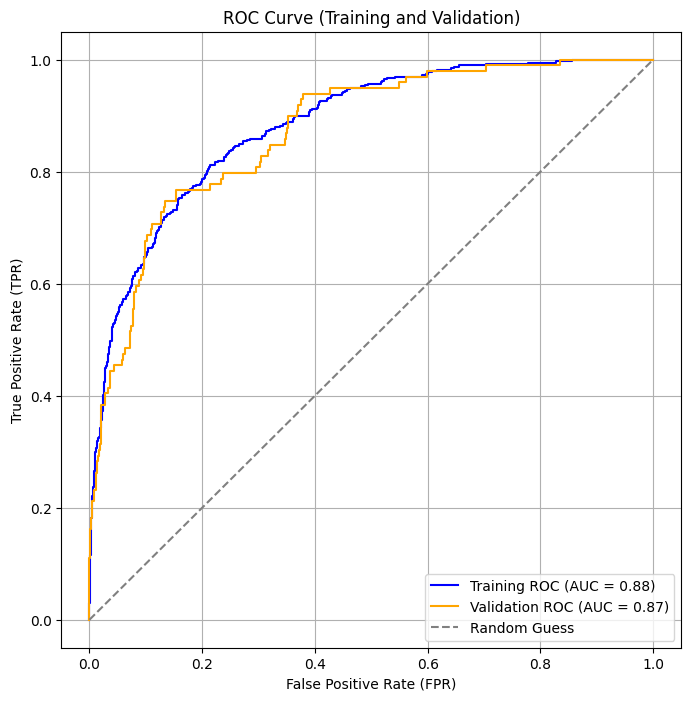

In [1339]:
from sklearn.metrics import roc_curve, roc_auc_score

def ensemble_predict(models, X):
    preds = np.zeros(X.shape[0])
    for model in models:
        preds += model.predict_proba(X)[:, 1]  # ÂêÑ„É¢„Éá„É´„ÅÆ‰∫àÊ∏¨Á¢∫Áéá„ÇíÂä†ÁÆó
    preds /= len(models)  # Âπ≥ÂùáÂåñ
    return preds

# „Ç¢„É≥„Çµ„É≥„Éñ„É´‰∫àÊ∏¨„ÅÆÂÆüË°å
ensemble_preds_tr = ensemble_predict(models, x_tr)
ensemble_preds_va = ensemble_predict(models, x_va)

fpr_tr, tpr_tr, _ = roc_curve(y_tr, ensemble_preds_tr)
auc_tr = roc_auc_score(y_tr, ensemble_preds_tr)

fpr_va, tpr_va, _ = roc_curve(y_va, ensemble_preds_va)
auc_va = roc_auc_score(y_va, ensemble_preds_va)

plt.figure(figsize=(8, 8))
plt.plot(fpr_tr, tpr_tr, label=f'Training ROC (AUC = {auc_tr:.2f})', color='blue')
plt.plot(fpr_va, tpr_va, label=f'Validation ROC (AUC = {auc_va:.2f})', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve (Training and Validation)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [1340]:
# y_pred_prob = model.predict_proba(test_df[features])[:, 1]
y_pred_prob = ensemble_predict(models, x_test)


sub = pd.read_csv('/content/drive/MyDrive/Â•ëÁ¥Ñ‰∫àÊ∏¨ÔºàSIGNATE Cup 2024Ôºâ/Êèê‰æõ„ÉÜ„Çô„Éº„Çø/sample_submit.csv', header=None)
test_ids = sub.iloc[:, 0]

submission = pd.DataFrame({
    'id': test_ids,
    'prob': y_pred_prob
})

submission_name = "prodtaken_submission15"

submission.to_csv(f'{submission_name}.csv', index=False, header=None)
submission.head()

id      prob
0  3489  0.161300
1  3490  0.256756
2  3491  0.306370
3  3492  0.381298
4  3493  0.350739